<a href="https://colab.research.google.com/github/ramanro24/-Churn-Busters-Decoding-Credit-Card-Loyalty-with-Data-/blob/main/Credit_card_attrition_analysis_By_Rohit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Read the datasets
df=pd.read_csv('BankChurners.csv')

In [ ]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [ ]:
# Find the empty column in the df
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                                                                                                       0
Card_Category                                                                                                                         0
Months_on_book                                                                                                                        0
Total_Relationship_Count                                                                                                              0
Months_Inactive_12_mon                                                                                                                0
Contacts_Count_12_mon                                                                                                                 0
Credit_Limit                                                                                                                          0
Total_Revolving_Bal                                                                                                                   0
Avg_Open_To_Buy                                                                                                                       0
Total_Amt_Chng_Q4_Q1                                                                                                                  0
Total_Trans_Amt                                                                                                                       0
Total_Trans_Ct                                                                                                                        0
Total_Ct_Chng_Q4_Q1                                                                                                                   0
Avg_Utilization_Ratio                                                                                                                 0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2    0
dtype: int64

In [ ]:
# What are the columns does the dataset have
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# Extract these columns and save in df: 'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender','Dependent_count', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
columns_to_extract = [
    'CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
    'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
    'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
    'Avg_Utilization_Ratio'
]

# Extract the columns and save to df
df = df[columns_to_extract]
df


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

# ** Data cleaning and preprocessing**

In [ ]:
# Overview the dataset based on the grouping of Atttion Flag and Gender
df.groupby(['Attrition_Flag',"Gender"] ).count()

CLIENTNUM  Customer_Age  Dependent_count  \
Attrition_Flag    Gender                                             
Attrited Customer F             930           930              930   
                  M             697           697              697   
Existing Customer F            4428          4428             4428   
                  M            4072          4072             4072   

                          Education_Level  Marital_Status  Income_Category  \
Attrition_Flag    Gender                                                     
Attrited Customer F                   930             930              930   
                  M                   697             697              697   
Existing Customer F                  4428            4428             4428   
                  M                  4072            4072             4072   

                          Card_Category  Months_on_book  \
Attrition_Flag    Gender                                  
Attrited Customer F                 930             930   
                  M                 697             697   
Existing Customer F                4428            4428   
                  M                4072            4072   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Attrition_Flag    Gender                                                     
Attrited Customer F                            930                     930   
                  M                            697                     697   
Existing Customer F                           4428                    4428   
                  M                           4072                    4072   

                          Contacts_Count_12_mon  Credit_Limit  \
Attrition_Flag    Gender                                        
Attrited Customer F                         930           930   
                  M                         697           697   
Existing Customer F                        4428          4428   
                  M                        4072          4072   

                          Total_Revolving_Bal  Avg_Open_To_Buy  \
Attrition_Flag    Gender                                         
Attrited Customer F                       930              930   
                  M                       697              697   
Existing Customer F                      4428             4428   
                  M                      4072             4072   

                          Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
Attrition_Flag    Gender                                          
Attrited Customer F                        930              930   
                  M                        697              697   
Existing Customer F                       4428             4428   
                  M                       4072             4072   

                          Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag    Gender                                        
Attrited Customer F                  930                  930   
                  M                  697                  697   
Existing Customer F                 4428                 4428   
                  M                 4072                 4072   

                          Avg_Utilization_Ratio  
Attrition_Flag    Gender                         
Attrited Customer F                         930  
                  M                         697  
Existing Customer F                        4428  
                  M                        4072

# ** Check Data Overview**

In [ ]:
# Check for the Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# What is the descriptive statistics of datasets
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [ ]:
#What are the different type of data types we have in the dataset across different columns
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# Handle the Missing values

In [ ]:
# Check for the null values across the columns.

df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Check and handling the duplicate value

In [ ]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data analysis

In [ ]:
# Discritive statistics of variable
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

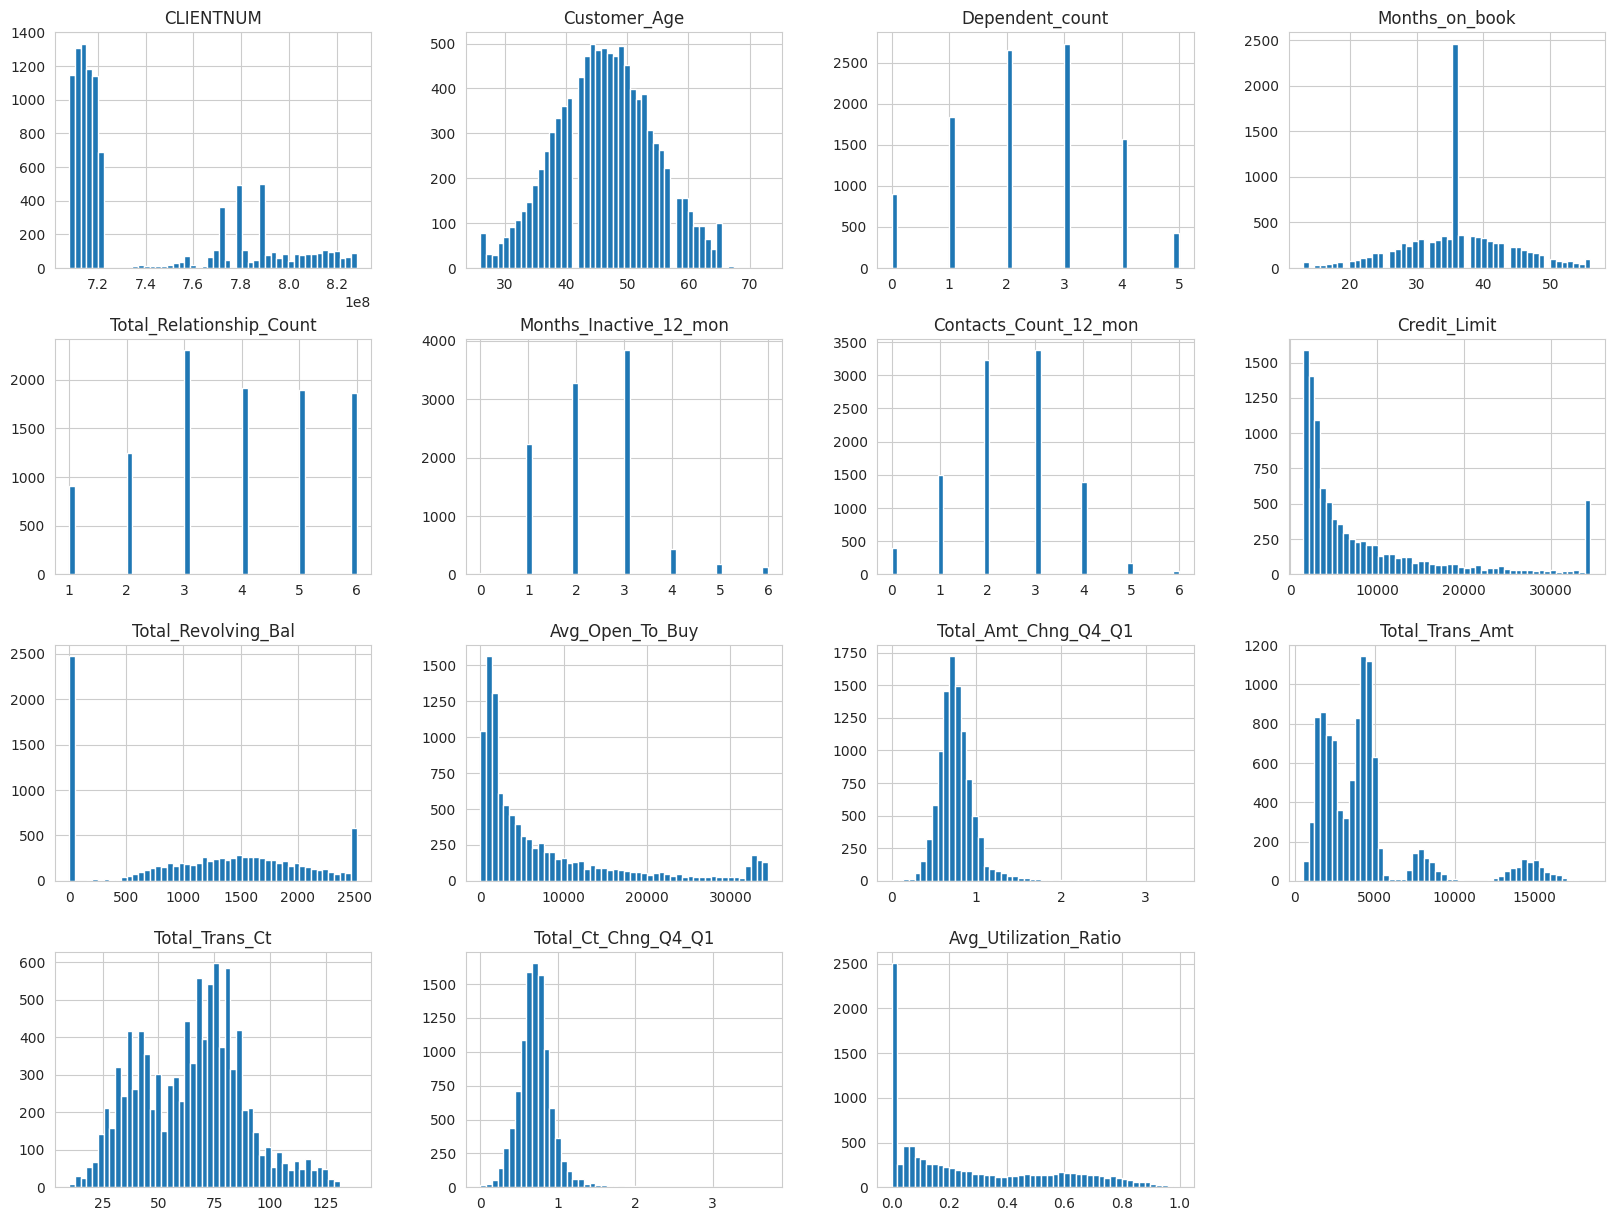

In [ ]:
# Check the distribution of variables.
df.hist(bins=50, figsize=(20,15))
plt.show()

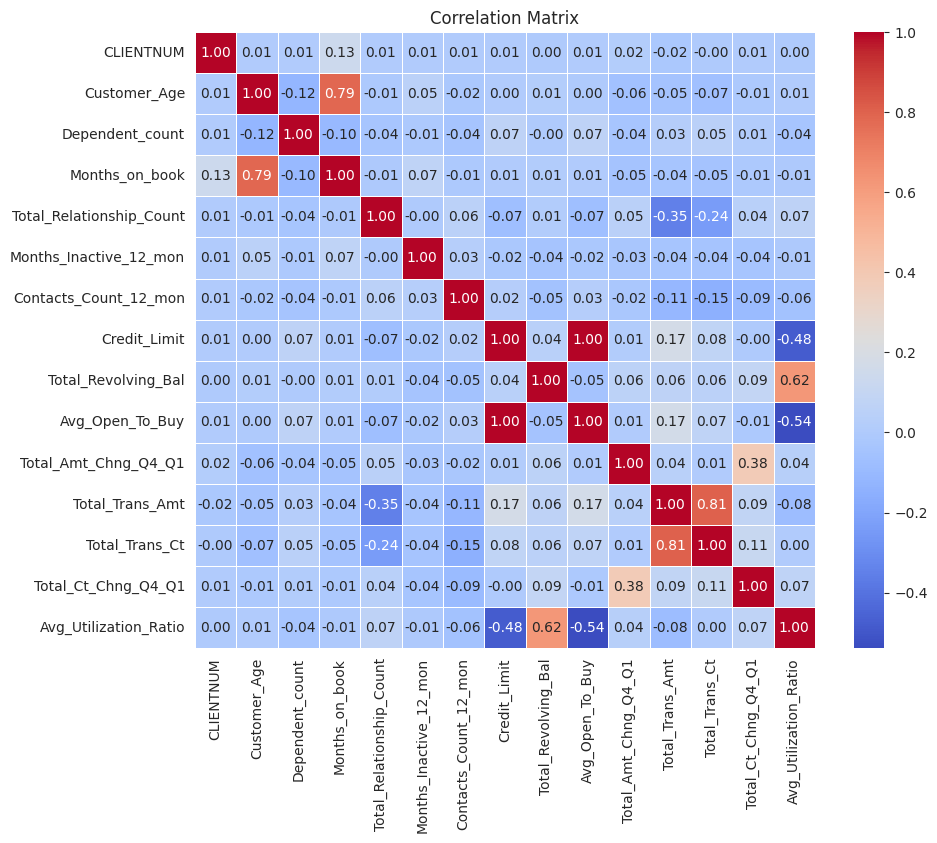

In [ ]:
#Plot the above correaliton matrix
#Plot the correlation matrix
# Calculate the correlation matrix, include numeric_only=True to only include numeric types.
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
import seaborn as sns # make sure to import seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Show the plot
plt.title("Correlation Matrix")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create upper triangle mask (convert to Boolean)
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Extract correlations from the upper triangle
corr_values = corr_matrix.where(mask).unstack().dropna()

# Sort values
most_positive = corr_values.sort_values(ascending=False)
most_negative = corr_values.sort_values()

# Convert to DataFrame for better readability
most_positive_df = most_positive.reset_index()
most_positive_df.columns = ["Variable 1", "Variable 2", "Correlation"]

most_negative_df = most_negative.reset_index()
most_negative_df.columns = ["Variable 1", "Variable 2", "Correlation"]

# Display top results
print("Top Positively Correlated Variables:")
print(most_positive_df.head(10))  # Change 10 to desired number

print("\nTop Negatively Correlated Variables:")
print(most_negative_df.head(10))  # Change 10 to desired number


Top Positively Correlated Variables:
              Variable 1            Variable 2  Correlation
0        Avg_Open_To_Buy          Credit_Limit     0.995981
1         Total_Trans_Ct       Total_Trans_Amt     0.807192
2         Months_on_book          Customer_Age     0.788912
3  Avg_Utilization_Ratio   Total_Revolving_Bal     0.624022
4    Total_Ct_Chng_Q4_Q1  Total_Amt_Chng_Q4_Q1     0.384189
5        Total_Trans_Amt          Credit_Limit     0.171730
6        Total_Trans_Amt       Avg_Open_To_Buy     0.165923
7         Months_on_book             CLIENTNUM     0.134588
8    Total_Ct_Chng_Q4_Q1        Total_Trans_Ct     0.112324
9    Total_Ct_Chng_Q4_Q1   Total_Revolving_Bal     0.089861

Top Negatively Correlated Variables:
              Variable 1                Variable 2  Correlation
0  Avg_Utilization_Ratio           Avg_Open_To_Buy    -0.538808
1  Avg_Utilization_Ratio              Credit_Limit    -0.482965
2        Total_Trans_Amt  Total_Relationship_Count    -0.347229
3        

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

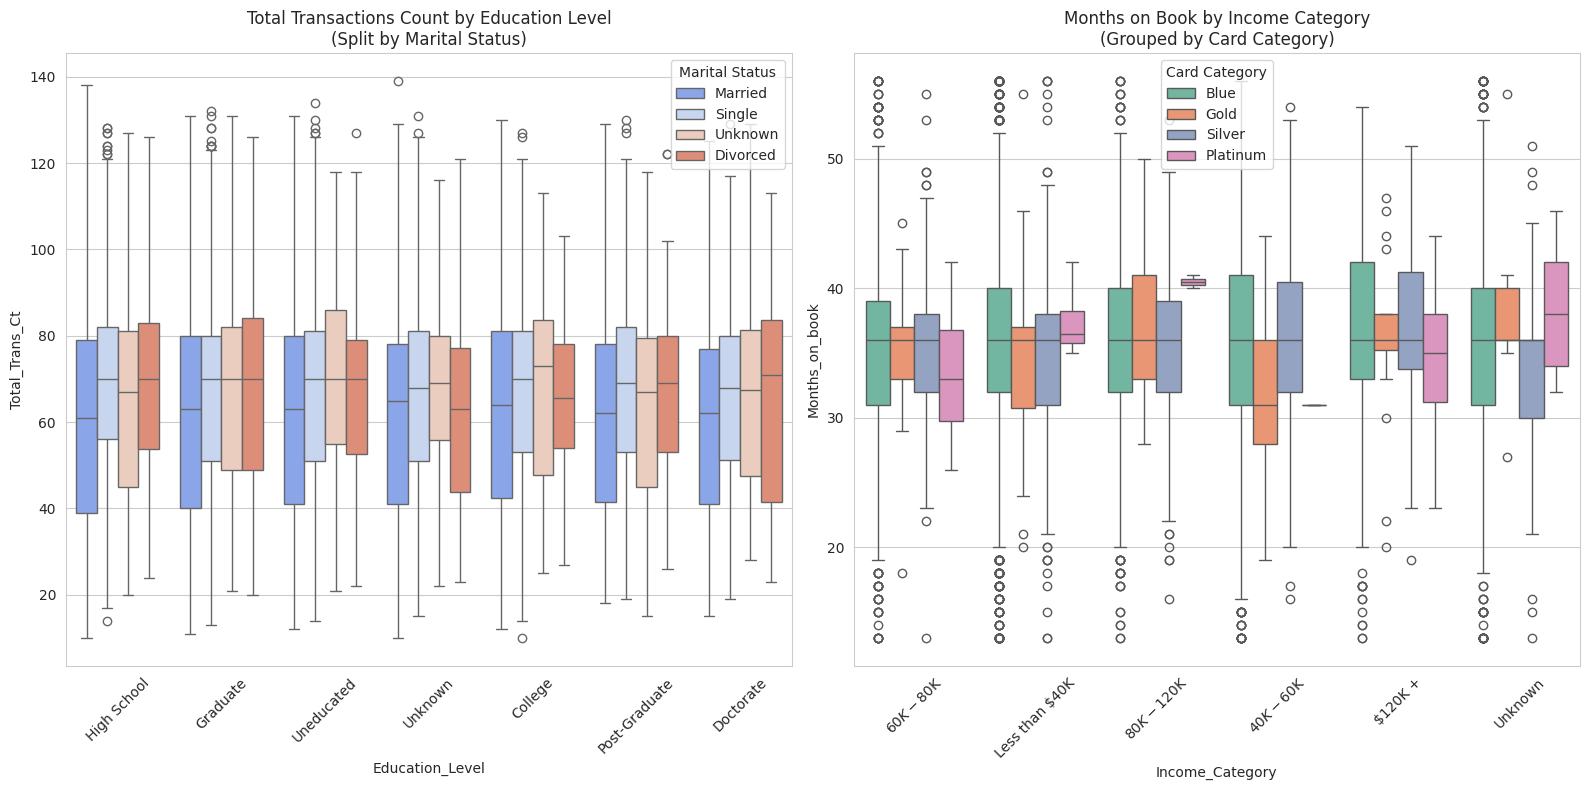

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better visualization aesthetics
sns.set_style("whitegrid")

# Create a 1x2 grid of subplots with a figure size of 16x8 inches
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Boxplot 1: Total Transactions Count by Education Level, split by Marital Status
# This plot displays how the number of transactions ('Total_Trans_Ct') varies by different education levels.
# The 'hue' parameter helps differentiate data based on 'Marital_Status'.
# Useful for understanding if educational background affects transaction activity.
sns.boxplot(x='Education_Level', y='Total_Trans_Ct', hue='Marital_Status', data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Total Transactions Count by Education Level\n(Split by Marital Status)")
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
axes[0].legend(title="Marital Status")  # Add legend for clarity

# Boxplot 2: Months on Book by Income Category, grouped by Card Category
# This plot shows the distribution of 'Months_on_book' (how long a customer has had an account) across different income levels.
# The 'hue' parameter differentiates the boxplots based on 'Card_Category'.
# Helps in analyzing if income levels affect how long customers stay with the bank and their preferred card category.
sns.boxplot(x='Income_Category', y='Months_on_book', hue='Card_Category', data=df, ax=axes[1], palette="Set2")
axes[1].set_title("Months on Book by Income Category\n(Grouped by Card Category)")
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
axes[1].legend(title="Card Category")  # Add legend for clarity

# Adjust layout to prevent overlapping elements and ensure clear visualization
plt.tight_layout()

# Display the plots
plt.show()



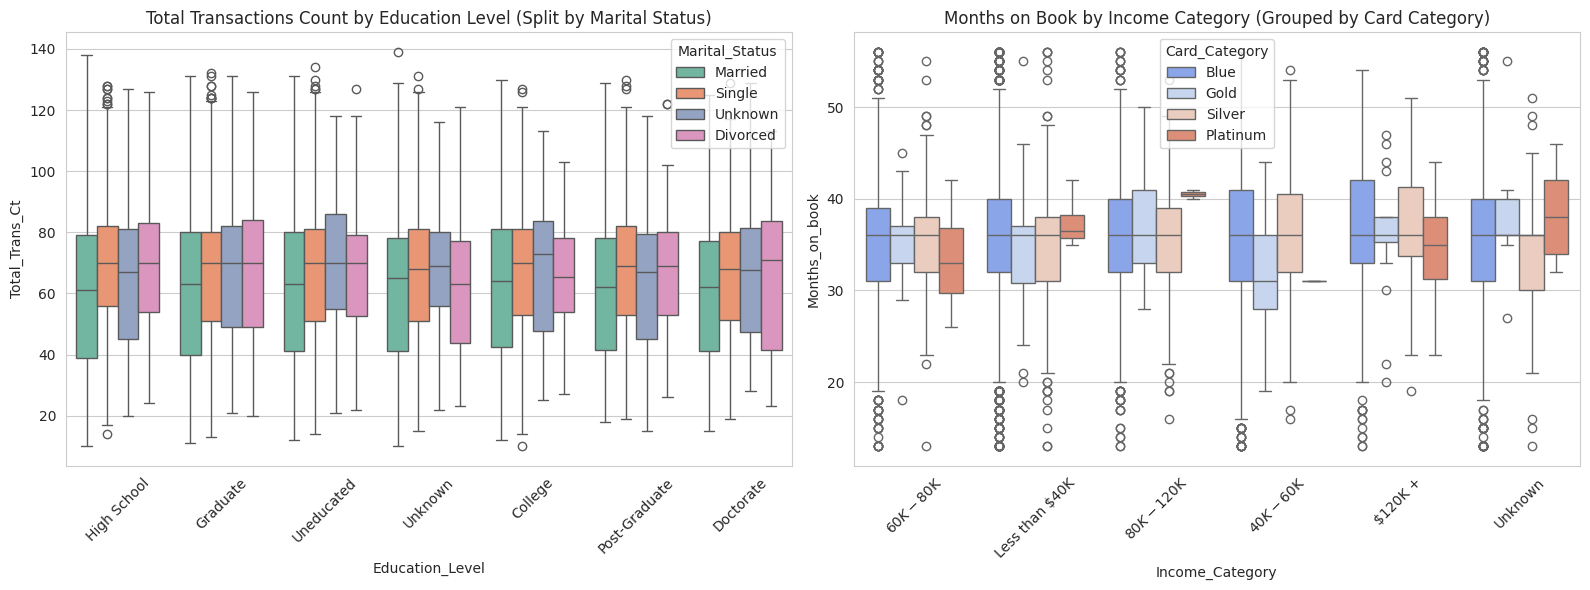

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette for a colorful theme
sns.set_style("whitegrid")
palette = sns.color_palette("husl")  # Using "husl" for a colorful look

# Create a 1x2 grid of subplots with a figure size of 16x6 inches
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot 1: Total_Trans_Ct by Education_Level, split by Marital_Status (hue)
sns.boxplot(x='Education_Level', y='Total_Trans_Ct', hue='Marital_Status',
            data=df, ax=axes[0], palette="Set2")  # Using "Set2" for distinct colors
axes[0].set_title("Total Transactions Count by Education Level (Split by Marital Status)")
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Boxplot 2: Months_on_book by Income_Category, grouped by Card_Category (hue)
sns.boxplot(x='Income_Category', y='Months_on_book', hue='Card_Category',
            data=df, ax=axes[1], palette="coolwarm")  # Using "coolwarm" for contrast
axes[1].set_title("Months on Book by Income Category (Grouped by Card Category)")
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to ensure no overlap
plt.tight_layout()

# Display the plots
plt.show()


## Sorting and Aggregating Data:

In [ ]:
#1.	Sort the dataset by Income_Category in ascending order.
df.sort_values(by="Income_Category", ascending=True)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
1577  713126733  Existing Customer            56      M                3   
4044  721388283  Existing Customer            54      M                2   
2286  718229133  Existing Customer            51      M                2   
9224  715830558  Attrited Customer            50      M                2   
2277  801048483  Existing Customer            34      M                3   
...         ...                ...           ...    ...              ...   
5505  720676158  Existing Customer            34      F                4   
5500  712414908  Existing Customer            45      F                4   
5498  713163258  Attrited Customer            38      F                2   
2967  738627708  Attrited Customer            49      F                2   
5063  778912683  Existing Customer            51      F                2   

     Education_Level Marital_Status Income_Category Card_Category  \
1577         College        Married         $120K +          Blue   
4044   Post-Graduate         Single         $120K +          Blue   
2286         College        Married         $120K +          Blue   
9224      Uneducated        Unknown         $120K +          Blue   
2277      Uneducated       Divorced         $120K +          Blue   
...              ...            ...             ...           ...   
5505      Uneducated         Single         Unknown          Blue   
5500         Unknown        Married         Unknown          Blue   
5498         Unknown        Married         Unknown          Blue   
2967         Unknown         Single         Unknown          Blue   
5063        Graduate         Single         Unknown          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1577              43  ...                       2                      2   
4044              45  ...                       1                      4   
2286              41  ...                       2                      4   
9224              38  ...                       2                      1   
2277              28  ...                       3                      3   
...              ...  ...                     ...                    ...   
5505              21  ...                       3                      2   
5500              37  ...                       2                      1   
5498              33  ...                       3                      3   
2967              41  ...                       3                      4   
5063              32  ...                       3                      1   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
1577       17539.0                 2517          15022.0   
4044        5597.0                    0           5597.0   
2286       23742.0                    0          23742.0   
9224       34516.0                  397          34119.0   
2277        9180.0                 1814           7366.0   
...            ...                  ...              ...   
5505        9005.0                 1994           7011.0   
5500        3241.0                    0           3241.0   
5498        3388.0                    0           3388.0   
2967        5984.0                    0           5984.0   
5063        8365.0                 1504           6861.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
1577                 0.743             1220              30   
4044                 0.596             4844              58   
2286                 0.769             3783              57   
9224                 0.914             7454              81   
2277                 0.628             2646              49   
...                    ...              ...             ...   
5505                 0.919             5223              89   
5500                 0.629             4992              80   
5498                 0.368             1959              52   


In [ ]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

In [ ]:
#2.	Filter customers where Gender is 'Male' and calculate the average Credit_Limit for these customers.


df[df['Gender']=="M"]['Credit_Limit'].mean()

np.float64(12685.674963304677)

In [ ]:
# Find the total number of customer in each card category and make a barplot:
df.groupby('Card_Category')['CLIENTNUM'].sum().sort_values(ascending=False)

Card_Category
Blue        6974338683888
Silver       410985651315
Gold          85623872853
Platinum      14703411285
Name: CLIENTNUM, dtype: int64

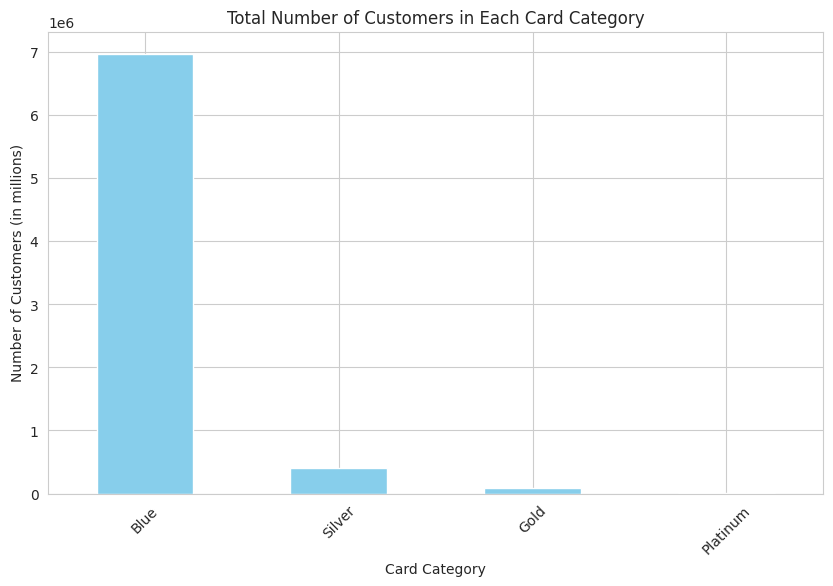

In [ ]:
import matplotlib.pyplot as plt

# Group by 'Card_Category' and sum 'CLIENTNUM'
card_counts = df.groupby('Card_Category')['CLIENTNUM'].sum().sort_values(ascending=False)

# Convert values to millions
card_counts_million = card_counts / 1e6

# Plot
plt.figure(figsize=(10, 6))
card_counts_million.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Card Category')
plt.ylabel('Number of Customers (in millions)')
plt.title('Total Number of Customers in Each Card Category')

# Show plot
plt.xticks(rotation=45)
plt.show()


In [ ]:
#4.	Calculate the mean Customer_Age for each Education_Level.
customer_age_by_education= df.groupby('Education_Level')['Customer_Age'].mean()

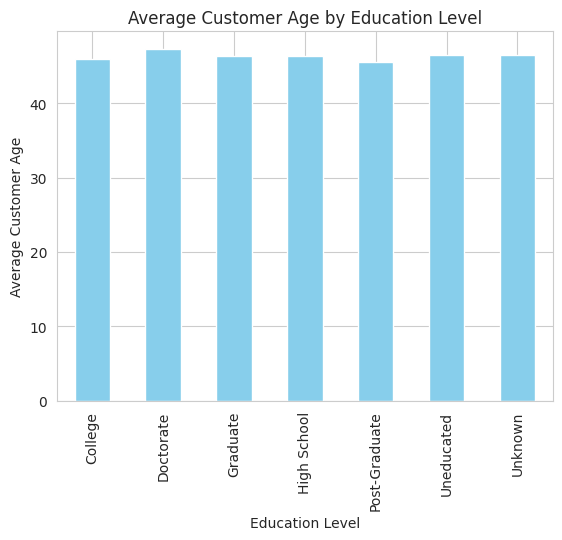

In [ ]:
#plot the figure:
customer_age_by_education.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Average Customer Age')
plt.title('Average Customer Age by Education Level')
plt.show()

In [ ]:
#5.	Sort the dataset by Total_Trans_Amt in descending order and display the top 10 customers.
df.sort_values(by="Total_Trans_Amt", ascending= False ).head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
9964   718140783  Existing Customer            47      M                4   
10073  717642633  Existing Customer            51      M                2   
10097  801036033  Existing Customer            31      M                0   
9601   716004258  Existing Customer            45      M                4   
9341   713758758  Existing Customer            48      M                2   
10117  712503408  Existing Customer            57      M                2   
10028  778428108  Existing Customer            36      F                1   
9643   721220583  Existing Customer            54      F                2   
9712   756658083  Existing Customer            49      M                4   
9645   713965683  Existing Customer            35      M                3   

      Education_Level Marital_Status Income_Category Card_Category  \
9964          Unknown        Married     $60K - $80K          Blue   
10073        Graduate        Married     $60K - $80K          Blue   
10097     High School         Single     $40K - $60K          Blue   
9601      High School         Single     $60K - $80K          Blue   
9341      High School        Married  Less than $40K        Silver   
10117        Graduate        Married    $80K - $120K          Blue   
10028        Graduate         Single  Less than $40K          Blue   
9643         Graduate        Married     $40K - $60K          Blue   
9712    Post-Graduate         Single    $80K - $120K          Blue   
9645    Post-Graduate        Married    $80K - $120K          Blue   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
9964               36  ...                       5                      2   
10073              40  ...                       3                      3   
10097              25  ...                       2                      3   
9601               35  ...                       1                      3   
9341               36  ...                       2                      2   
10117              40  ...                       3                      4   
10028              16  ...                       5                      3   
9643               41  ...                       1                      3   
9712               42  ...                       2                      1   
9645               28  ...                       1                      2   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
9964        10585.0                 1749           8836.0   
10073        3750.0                 1801           1949.0   
10097        4493.0                 1388           3105.0   
9601         8449.0                 2092           6357.0   
9341        14581.0                 2517          12064.0   
10117       17925.0                 1909          16016.0   
10028        6091.0                 1184           4907.0   
9643         7362.0                 1176           6186.0   
9712        30885.0                 2018          28867.0   
9645         4380.0                    0           4380.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9964                  0.655            18484             108   
10073                 0.889            17995             116   
10097                 0.795            17744             104   
9601                  0.709            17634             120   
9341                  0.776            17628             109   
10117                 0.712            17498             111   
10028                 0.766            17437             113   
9643                  0.735            17390             130   
9712                  0.904            17350             115   
9645                  0.719            17258             121   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
9964                 0.588                  0.165  
10073                0.657                  0.480  
10097  

In [ ]:
#6.	Count the number of customers with a Marital_Status of 'Single' and Attrition_Flag of 'Attrited Customer'.

df[(df["Marital_Status"] == "Single") & (df['Attrition_Flag'] == 'Attrited Customer')].shape[0]
#Remember here count will count all the null values across the column, but shape would count all the rows based on the above conditions

668

In [ ]:
#7.	Calculate the average Avg_Utilization_Ratio for customers who have a Months_on_book greater than 12 months.
df[df['Months_on_book'] > 12]['Avg_Utilization_Ratio'].mean()




np.float64(0.2748935518909845)

In [ ]:
#7.	Calculate the average Avg_Utilization_Ratio for customers who have a Months_on_book greater than 12 months based on the gender.
df[df['Months_on_book']>12].groupby('Gender')['Avg_Utilization_Ratio'].mean()


Gender
F    0.341957
M    0.199548
Name: Avg_Utilization_Ratio, dtype: float64

In [ ]:
#8.Find the customer with the highest Total_Relationship_Count.
df[df['Total_Relationship_Count'] == df['Total_Relationship_Count'].max()]

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
1      818770008  Existing Customer            49      F                5   
6      810347208  Existing Customer            51      M                4   
9      719661558  Existing Customer            48      M                2   
11     710821833  Existing Customer            65      M                1   
16     709967358  Existing Customer            48      M                4   
...          ...                ...           ...    ...              ...   
10076  712516608  Existing Customer            43      M                3   
10111  710734308  Existing Customer            49      M                1   
10117  712503408  Existing Customer            57      M                2   
10118  713755458  Attrited Customer            50      M                1   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
1            Graduate         Single  Less than $40K          Blue   
6             Unknown        Married         $120K +          Gold   
9            Graduate         Single    $80K - $120K          Blue   
11            Unknown        Married     $40K - $60K          Blue   
16      Post-Graduate         Single    $80K - $120K          Blue   
...               ...            ...             ...           ...   
10076        Graduate        Married    $80K - $120K          Blue   
10111        Graduate         Single     $60K - $80K          Blue   
10117        Graduate        Married    $80K - $120K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1                  44  ...                       1                      2   
6                  46  ...                       1                      3   
9                  36  ...                       3                      3   
11                 54  ...                       2                      3   
16                 36  ...                       2                      3   
...               ...  ...                     ...                    ...   
10076              36  ...                       2                      3   
10111              40  ...                       3                      3   
10117              40  ...                       3                      4   
10118              36  ...                       3                      4   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
1            8256.0                  864           7392.0   
6           34516.0                 2264          32252.0   
9           11656.0                 1677           9979.0   
11           9095.0                 1587           7508.0   
16          30367.0                 2362          28005.0   
...             ...                  ...              ...   
10076        3946.0                 1275           2671.0   
10111        6481.0                 1569           4912.0   
10117       17925.0                 1909          16016.0   
10118        9959.0                  952           9007.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
1                     1.541             1291              33   
6                     1.975             1330              31   
9                     1.524             1441              32   
11                    1.433             1314              26   
16                    1.708             1671              27   
...                     ...              ...             ...   
10076                 0.647            14822              96   
10111                 0.692            15937             119   
10117  

In [ ]:
#9. "Find the total Total_Relationship_Count grouped by Attrition_Flag status based on the education level"

df.groupby(['Attrition_Flag', 'Education_Level'])['Total_Relationship_Count'].mean().sort_values(ascending= False)

Attrition_Flag     Education_Level
Existing Customer  Post-Graduate      4.011792
                   Uneducated         3.957600
                   Unknown            3.920823
                   High School        3.913298
                   Graduate           3.911776
                   College            3.838184
                   Doctorate          3.837079
Attrited Customer  Doctorate          3.410526
                   Graduate           3.355236
                   Post-Graduate      3.347826
                   College            3.253247
                   Uneducated         3.240506
                   High School        3.215686
                   Unknown            3.191406
Name: Total_Relationship_Count, dtype: float64

In [ ]:
#9.	Calculate the total Total_Trans_Amt for each Card_Category.
df.groupby('Card_Category')['Total_Trans_Amt'].sum()

Card_Category
Blue        39870938
Gold          891531
Platinum      179995
Silver       3657718
Name: Total_Trans_Amt, dtype: int64

##  Business want to know who are the customer what are their profile who have been inactive for more than 5 months but less than 6


In [ ]:
#10.	Filter the customers who have been inactive for more than 6 months (Months_Inactive_12_mon > 6) and count them.

df[df['Months_Inactive_12_mon'] >5 ].shape[0]

124

In [ ]:
inactive_customers = df[df['Months_Inactive_12_mon'] > 5]

# Count of inactive customers
inactive_count = inactive_customers.shape[0]

# Unique values and counts for card types, gender, and education
card_distribution = inactive_customers['Card_Category'].value_counts()
gender_distribution = inactive_customers['Gender'].value_counts()
education_distribution = inactive_customers['Education_Level'].value_counts()

print(f"Total inactive customers: {inactive_count}")
print("\nCard Type Distribution:\n", card_distribution)
print("\nGender Distribution:\n", gender_distribution)
print("\nEducation Background Distribution:\n", education_distribution)


Total inactive customers: 124

Card Type Distribution:
 Card_Category
Blue      119
Silver      3
Gold        2
Name: count, dtype: int64

Gender Distribution:
 Gender
F    70
M    54
Name: count, dtype: int64

Education Background Distribution:
 Education_Level
Graduate         41
Unknown          24
High School      23
Uneducated       14
Doctorate        10
College           9
Post-Graduate     3
Name: count, dtype: int64


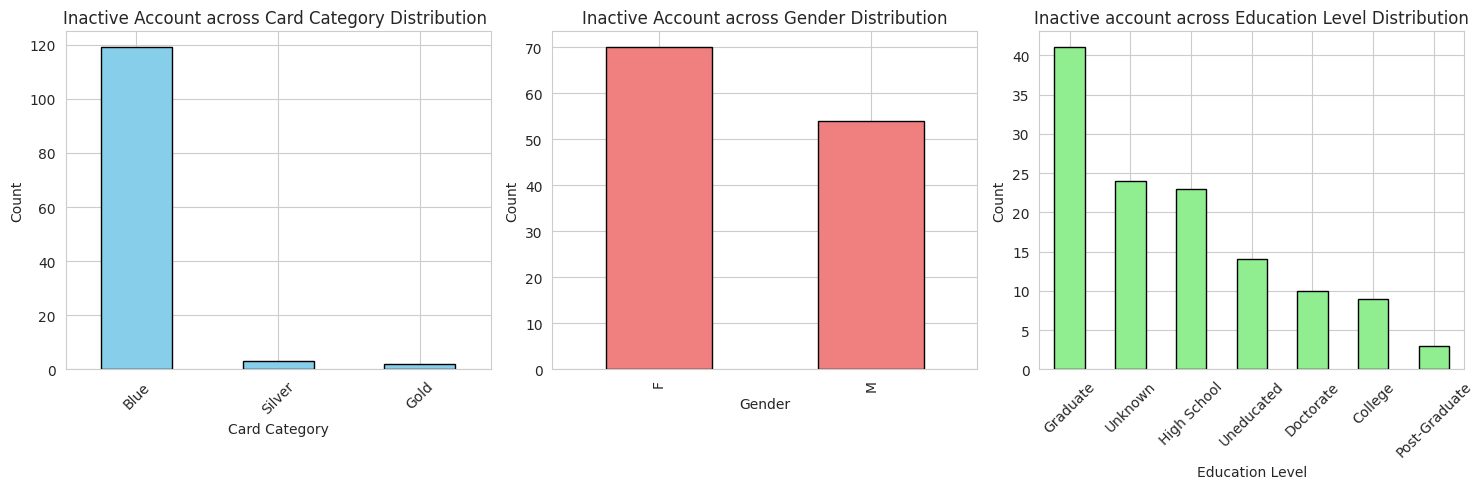

In [ ]:
import matplotlib.pyplot as plt

# Filter inactive customers
inactive_customers = df[df['Months_Inactive_12_mon'] > 5]

# Count unique values for card types, gender, and education
card_distribution = inactive_customers['Card_Category'].value_counts()
gender_distribution = inactive_customers['Gender'].value_counts()
education_distribution = inactive_customers['Education_Level'].value_counts()

# Create bar charts
plt.figure(figsize=(15, 5))

# Bar chart for Card Category distribution
plt.subplot(1, 3, 1)
card_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Inactive Account across Card Category Distribution ')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Bar chart for Gender distribution
plt.subplot(1, 3, 2)
gender_distribution.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Inactive Account across Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Bar chart for Education Level distribution
plt.subplot(1, 3, 3)
education_distribution.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Inactive account across Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


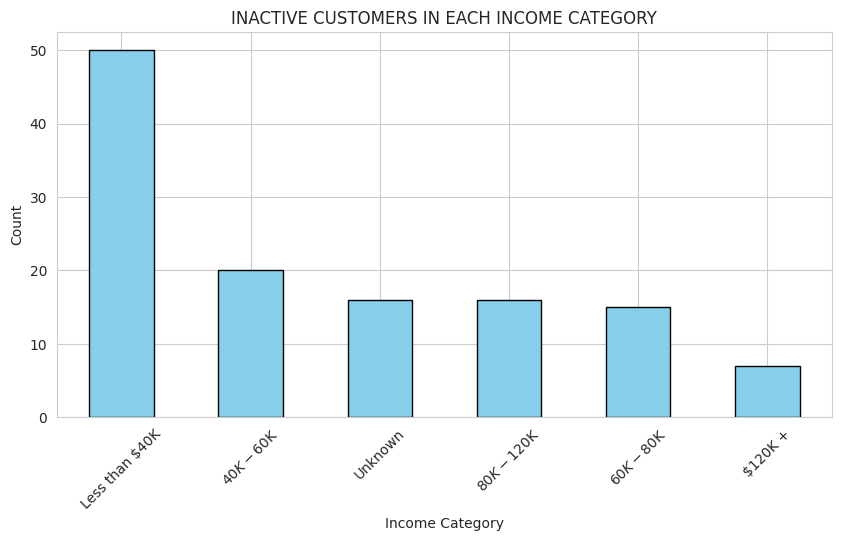

In [ ]:
 #11 Find the income category of customers who have been inactive for more than 5 months.
 inactive_customers=df[df['Months_Inactive_12_mon'] > 5]

 # Count the inacative customers:
 inactive_distributions = inactive_customers['Income_Category'].value_counts()

 #Plot the bars:

 plt.figure(figsize=(10,5))
 inactive_distributions.plot(kind='bar', color='skyblue', edgecolor='black')
 plt.title('INACTIVE CUSTOMERS IN EACH INCOME CATEGORY')
 plt.xlabel('Income Category')
 plt.ylabel('Count')
 plt.xticks(rotation=45)
 plt.show()

In [ ]:
# 11.	Group the dataset by Income_Category and calculate the median Avg_Open_To_Buy for each group.
df.groupby('Income_Category')['Avg_Open_To_Buy'].median()

Income_Category
$120K +           17117.0
$40K - $60K        2580.5
$60K - $80K        6418.5
$80K - $120K      11606.0
Less than $40K     1478.0
Unknown            5464.5
Name: Avg_Open_To_Buy, dtype: float64

In [ ]:
# 12.Find the mean of  total Total_Trans_Amt for customers across the gender who have Total_Trans_Ct greater than 50.
df[df['Total_Trans_Ct']>50].groupby('Gender')['Total_Trans_Amt'].mean()

Gender
F    5235.630631
M    5961.645472
Name: Total_Trans_Amt, dtype: float64

In [ ]:
#14.	Find the average Total_Revolving_Bal by Education_Level for customers who have a Card_Category of 'Blue'.

df[df['Card_Category']=='Blue'].groupby('Education_Level')['Total_Revolving_Bal'].mean()

Education_Level
College          1122.006383
Doctorate        1093.082938
Graduate         1160.268713
High School      1183.971398
Post-Graduate    1188.418067
Uneducated       1159.383896
Unknown          1149.156338
Name: Total_Revolving_Bal, dtype: float64

In [ ]:
#15.	Sort the dataset by Total_Amt_Chng_Q4_Q1 in descending order and calculate the average Total_Amt_Chng_Q4_Q1 for customers in the top 5% of this sorted list.
top_5_avg = df.nlargest(int(0.05 * len(df)), 'Total_Amt_Chng_Q4_Q1')['Total_Amt_Chng_Q4_Q1'].mean()
top_5_avg

np.float64(1.3665988142292491)

In [ ]:
#15.	Calculate the percentage of customers who have Attrition_Flag as 'Attrited Customer' for each Income_Category.

attrited_percentage=df[df['Attrition_Flag']=="Attrited Customer"].groupby('Income_Category')['CLIENTNUM'].count()/len(df)*100
attrited_percentage

Income_Category
$120K +           1.244199
$40K - $60K       2.676015
$60K - $80K       1.866298
$80K - $120K      2.389651
Less than $40K    6.043251
Unknown           1.846549
Name: CLIENTNUM, dtype: float64

In [ ]:
#16.	Group customers by Marital_Status, and gender and calculate the sum of Contacts_Count_12_mon for each group.
df.groupby(['Marital_Status', "Gender"])['Contacts_Count_12_mon'].sum()

Marital_Status  Gender
Divorced        F          970
                M          842
Married         F         5852
                M         5665
Single          F         5218
                M         4507
Unknown         F          892
                M          919
Name: Contacts_Count_12_mon, dtype: int64

In [ ]:
#17For customers with a Months_on_book greater than 24 months, calculate the maximum Credit_Limit.
df[df['Months_on_book']>12].groupby('Income_Category')['Credit_Limit'].max()

Income_Category
$120K +           34516.0
$40K - $60K       23981.0
$60K - $80K       34516.0
$80K - $120K      34516.0
Less than $40K    15987.0
Unknown           34516.0
Name: Credit_Limit, dtype: float64

# Customer Attrition Prediction Using Machine Learning

Introduction
Customer attrition, or churn, is a key challenge for businesses, particularly in the financial sector. Identifying customers at risk of leaving enables organizations to implement proactive retention strategies, such as personalized offers and improved customer engagement. This study employs machine learning techniques to predict customer attrition and determine key factors contributing to churn.

**Data Preprocessing**
To ensure the dataset was suitable for modeling, the following preprocessing steps were performed:

**Handling Categorical Variables:**

**The target variable, Attrition_Flag, was label-encoded:**
Existing Customer → 1
Attrited Customer → 0
Categorical features (Gender, Education_Level, Marital_Status, Income_Category, Card_Category) were also label-encoded for compatibility with machine learning algorithms.
Feature Selection:

The column CLIENTNUM was dropped as it was only an identifier and did not provide predictive value.
The remaining variables, including Credit Limit, Total Transaction Amount, Total Transaction Count, and Utilization Ratio, were retained based on their potential influence on attrition.

**Train-Test Split:**

The dataset was split into 80% training and 20% testing to evaluate model performance.
Stratified sampling was applied to maintain class balance.

**Feature Scaling:**

Numerical variables were standardized using StandardScaler to normalize the data distribution and improve model performance.


**Machine Learning Model: Random Forest Classifier**

The Random Forest Classifier, an ensemble learning method, was selected due to its robustness and ability to handle both categorical and numerical data. It helps in minimizing overfitting by combining multiple decision trees.

**Model Training**
The Random Forest model was trained using 100 decision trees (n_estimators=100).
The model learned patterns from the training data to distinguish between existing and attrited customers.
Model Evaluation
The model's performance was assessed using various metrics:

**Accuracy Score: **

Measures the proportion of correctly classified instances.

**Classification Report:**

Includes Precision, Recall, and F1-score for both classes.
Helps assess how well the model predicts attrition versus retention.

**Confusion Matrix:**

Visual representation of correct and incorrect predictions.
Highlights false positives and false negatives.


<ipython-input-175-c39e272e80d2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition_Flag'] = label_encoder.fit_transform(df['Attrition_Flag'])  # 1 = Existing, 0 = Attrited
<ipython-input-175-c39e272e80d2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-175-c39e272e80d2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

Accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       325
           1       0.95      0.98      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.93      0.87      0.89      2026
weighted avg       0.95      0.95      0.94      2026



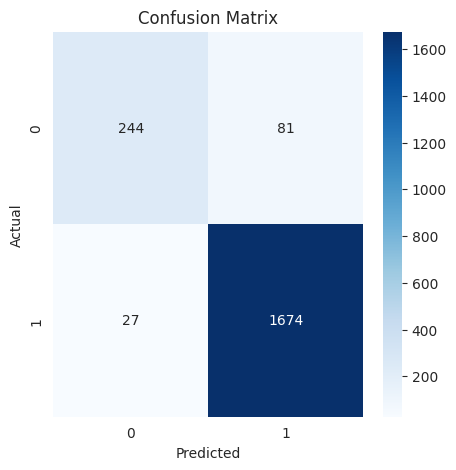

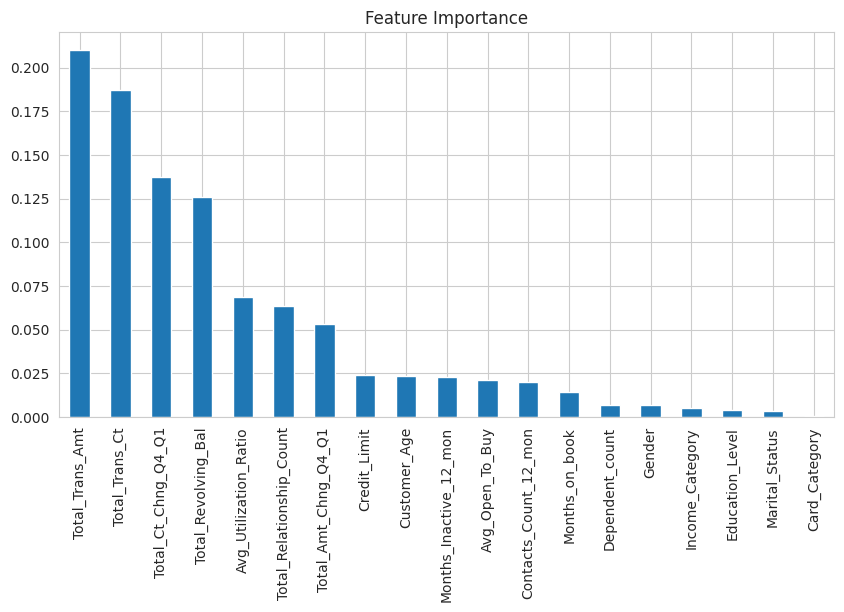

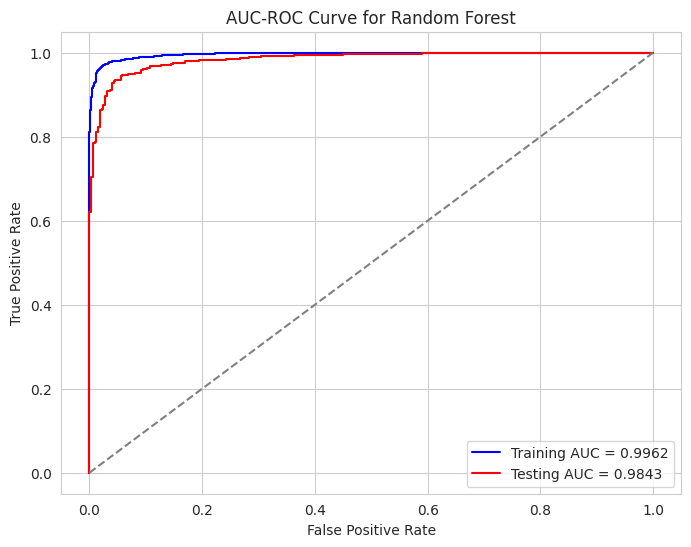

In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


# Encode categorical variables
label_encoder = LabelEncoder()
df['Attrition_Flag'] = label_encoder.fit_transform(df['Attrition_Flag'])  # 1 = Existing, 0 = Attrited

# List of categorical columns
categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Define features and target variable
X = df.drop(columns=['CLIENTNUM', 'Attrition_Flag'])
y = df['Attrition_Flag']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier (Prevent Overfitting)
rf_model = RandomForestClassifier(
    n_estimators=50,  # Reduce number of trees
    max_depth=10,  # Limit tree depth
    min_samples_split=10,  # Require at least 10 samples to split
    min_samples_leaf=5,  # Require at least 5 samples in each leaf node
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
plt.figure(figsize=(10, 5))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")
plt.show()

# AUC-ROC Curve for Training and Testing Data
y_train_prob = rf_model.predict_proba(X_train)[:, 1]  # Probabilities for Training Set
y_test_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for Testing Set

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

train_auc = auc(fpr_train, tpr_train)
test_auc = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Training AUC = {train_auc:.4f}', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Testing AUC = {test_auc:.4f}', color='red')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Random Forest')
plt.legend()
plt.show()




In [ ]:
print(f"Training AUC: {train_auc:.4f}, Testing AUC: {test_auc:.4f}")


Training AUC: 0.9962, Testing AUC: 0.9843


# Customer Segmentation Using K-Means Clustering
**Introduction**
Customer segmentation is a key data analysis technique used to categorize customers based on their behavior, spending patterns, and financial activity. In this project, I  applied K-Means clustering to group customers into meaningful segments based on their transaction history and credit activity.

# Feature Selection
For clustering, I selected the following three features:

**Total_Trans_Amt -**  The total amount of transactions made by a customer in a given period.

**Total_Relationship_Count -**   The number of products/services the customer holds with the company.

**Credit_Limit - ** The maximum amount of credit available to the customer.
These features are crucial because they capture spending behavior, engagement level, and financial capacity, which help differentiate customers into distinct groups.

**Data Preprocessing**

Before applying clustering, I standardized the features using StandardScaler to ensure that all variables have a similar scale. This is important because K-Means relies on distance calculations, and features with larger ranges could dominate clustering decisions.

**Finding the Optimal Number of Clusters (K)**

To determine the optimal number of clusters, we used the Elbow Method, which analyzes the Within-Cluster Sum of Squares (WCSS). The elbow point in the plot represents the value of K where adding more clusters provides minimal improvement. Based on the analysis, we selected K = 3 as the optimal number of clusters.

**Applying K-Means Clustering**

With K = 3, we trained the K-Means model and assigned each customer to one of the three clusters. After clustering, I calculated the mean values of the selected features for each cluster to interpret their characteristics.

**Assigning Meaningful Cluster Labels**


By analyzing the cluster means, we assigned descriptive labels to each segment:

**Low Spenders with High Credit (Cluster 0)**

Low Total_Trans_Amt (spends conservatively)
High Credit_Limit (trusted financially but does not spend much)
Moderate Total_Relationship_Count (some level of engagement)
These customers have high financial trust but do not utilize their credit as much, making them low spenders despite having a high credit limit.

**Moderate Spenders with Medium Credit (Cluster 1)**

Moderate Total_Trans_Amt (spends occasionally)
Medium Credit_Limit (moderate financial trust)
Moderate Total_Relationship_Count (some engagement with the company’s offerings)
These customers balance their spending and credit usage, falling into the mid-tier category.

**High Spenders with Medium Credit (Cluster 2)**

High Total_Trans_Amt (spends a lot)
Medium Credit_Limit (moderate financial access)
High Total_Relationship_Count (engaged with multiple products/services)
These customers are active spenders who frequently engage with the company's offerings, despite having a medium credit limit.

**Visualizing Clusters Using PCA**

Since I had three features, I  used Principal Component Analysis (PCA) to reduce the data to two principal components (PCA1 and PCA2) for visualization. Each customer was plotted on a 2D scatter plot, where:

The color represents the assigned cluster.
The spread of points shows how different clusters are separated.
The legend explains the customer segment each cluster represents.

**Why We Changed Labels from PC1 to Feature Names**

Originally, the visualization used PCA1 and PCA2, which are mathematical transformations of the original features. However, PCA does not retain feature names, so these labels are abstract. To ensure interpretability, I re-examined the clustering results using the original feature names (Total_Trans_Amt, Total_Relationship_Count, Credit_Limit). This helped me derive real-world insights rather than relying on unnamed principal components.



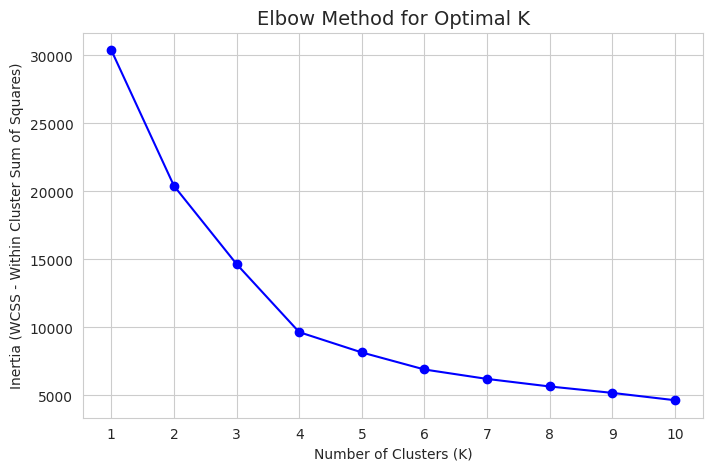

<ipython-input-177-bc887030b80f>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df_scaled)


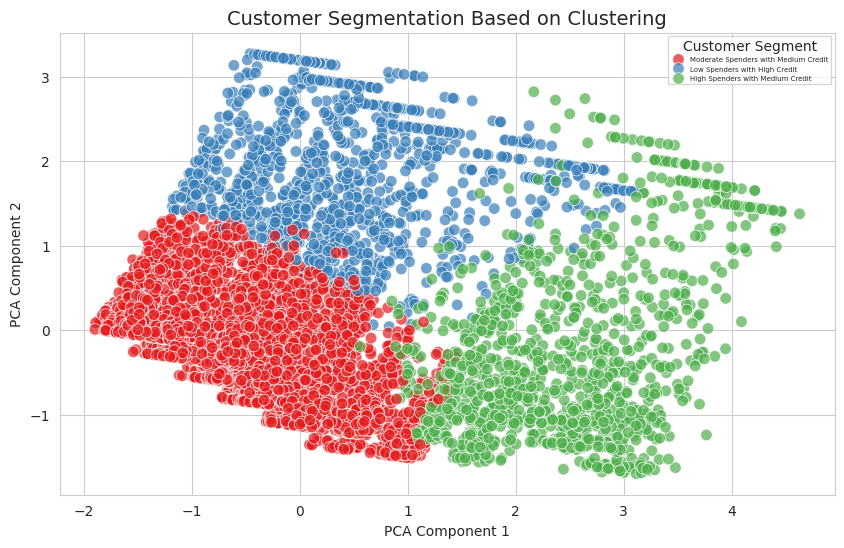

Cluster Summary:
 Cluster  Segment                             
0        Moderate Spenders with Medium Credit    7547
2        Low Spenders with High Credit           1396
1        High Spenders with Medium Credit        1184
Name: count, dtype: int64
Mean Values of Features per Cluster:
    Cluster  Total_Trans_Amt  Credit_Limit
2        2           3354.5       25657.5
0        0           3622.0        3252.0
1        1          13804.0        9300.5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Selecting key features for segmentation
features = ['Total_Trans_Amt', 'Total_Relationship_Count', 'Credit_Limit']
df_segment = df[features]

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segment)

# ------ Elbow Method to Find Optimal K ------
inertia = []
K_range = range(1, 11)  # Checking for K=1 to K=10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS - Within Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xticks(K_range)
plt.grid(True)
plt.show()

# ---- Applying K-Means Clustering with Optimal K ----
optimal_k = 3  # Choose based on elbow bending point
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# ---- Dynamically Assigning Cluster Names ----
cluster_summary = df.groupby('Cluster').agg({
    'Total_Trans_Amt': 'median',
    'Credit_Limit': 'median'
}).reset_index()

# Sorting clusters based on transaction amount and credit limit
cluster_summary = cluster_summary.sort_values(by=['Total_Trans_Amt', 'Credit_Limit'])

# Assigning names based on actual behavior
cluster_names = {
    cluster_summary.iloc[0]['Cluster']: "Low Spenders with High Credit",
    cluster_summary.iloc[1]['Cluster']: "Moderate Spenders with Medium Credit",
    cluster_summary.iloc[2]['Cluster']: "High Spenders with Medium Credit"
}

# Mapping names to DataFrame
df['Segment'] = df['Cluster'].map(cluster_names)

# ---- Visualizing Clusters Using PCA ----
pca = PCA(n_components=2)  # Reduce dimensions to 2D
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Segment', data=df, palette='Set1', s=70, alpha=0.7)

# Updated title size
plt.title('Customer Segmentation Based on Clustering', fontsize=14)

# Move legend to the top right
plt.legend(title="Customer Segment", loc='upper right', bbox_to_anchor=(1, 1), prop={'size': 5})

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

# Display Cluster Summary
print("Cluster Summary:\n", df[['Cluster', 'Segment']].value_counts())

# Show Cluster Means
print("Mean Values of Features per Cluster:\n", cluster_summary)


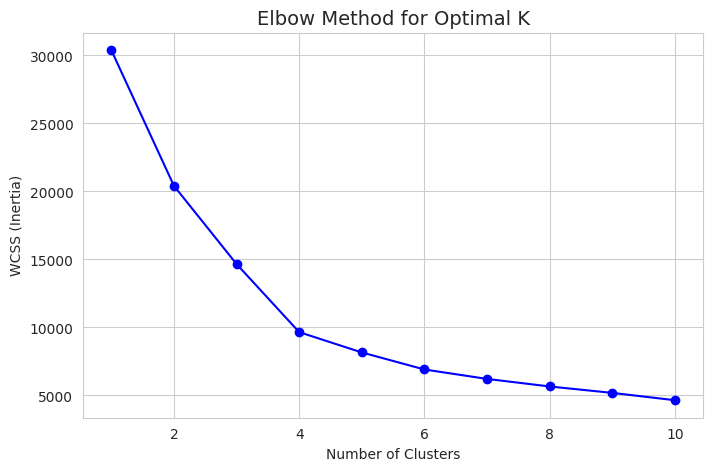

Cluster Summary:
 Cluster  Segment                            
0        Moderate spender with medium Credit    7547
2        Low Spender with High Credit           1396
1        High Spenders with High Credit         1184
Name: count, dtype: int64


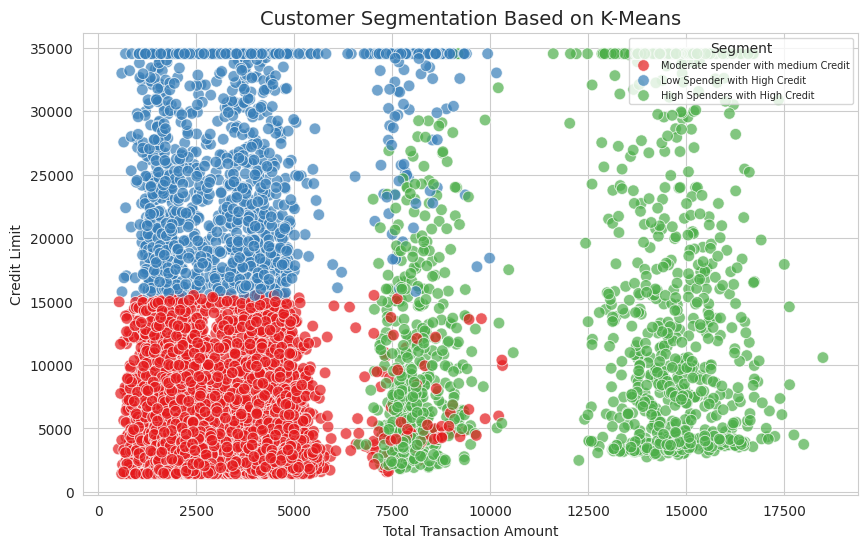

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and Select Features
features = ['Total_Trans_Amt', 'Total_Relationship_Count', 'Credit_Limit']
df_segment = df[features]

# Standardizing Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segment)

# ---- Elbow Method ----
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.grid(True)
plt.show()

# ---- Apply K-Means Clustering ----
optimal_k = 3  # Choose based on elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# ---- Assign Meaningful Labels ----
labels = {
    0: "Moderate spender with medium Credit",
    1: "High Spenders with High Credit",
    2: "Low Spender with High Credit"
}
df['Segment'] = df['Cluster'].map(labels)

# ---- Display Results ----
print("Cluster Summary:\n", df[['Cluster', 'Segment']].value_counts())

# ---- Visualizing Clusters ----
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_segment['Total_Trans_Amt'], y=df_segment['Credit_Limit'], hue=df['Segment'], palette='Set1', s=70, alpha=0.7)

# Adjust title size
plt.title("Customer Segmentation Based on K-Means", fontsize=14)

# Move legend to the top-right
plt.legend(title="Segment", loc='upper right', bbox_to_anchor=(1, 1), prop={'size': 7})

plt.xlabel("Total Transaction Amount")
plt.ylabel("Credit Limit")
plt.grid(True)
plt.show()


In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Cluster', 'Segment', 'PCA1', 'PCA2'],
      dtype='object')

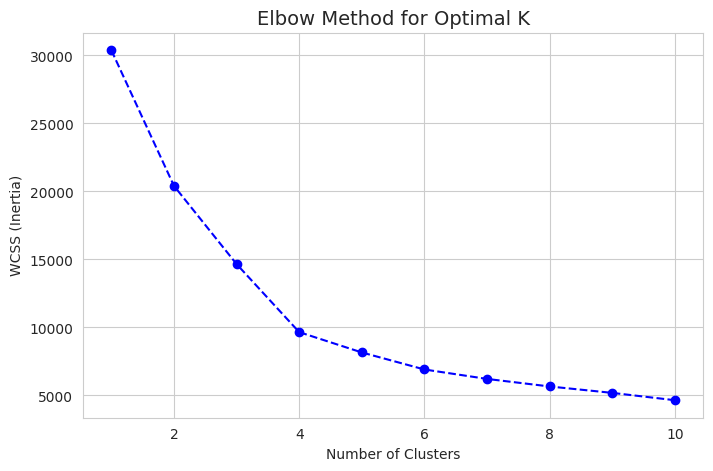

Cluster Summary:
 Cluster  Segment                            
0        Moderate spender with medium Credit    7547
2        Low Spender with High Credit           1396
1        High Spenders with High Credit         1184
Name: count, dtype: int64


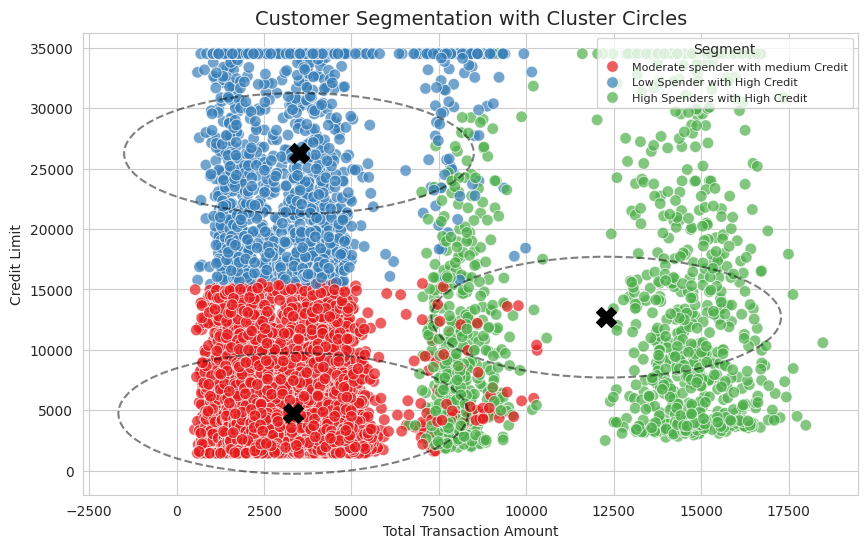

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and Select Features
features = ['Total_Trans_Amt', 'Total_Relationship_Count', 'Credit_Limit']
df_segment = df[features]

# Standardizing Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_segment)

# ---- Elbow Method ----
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.grid(True)
plt.show()

# ---- Apply K-Means Clustering ----
optimal_k = 3  # Choose based on elbow graph
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# ---- Assign Meaningful Labels ----
labels = {
    0: "Moderate spender with medium Credit",
    1: "High Spenders with High Credit",
    2: "Low Spender with High Credit"
}
df['Segment'] = df['Cluster'].map(labels)

# ---- Display Results ----
print("Cluster Summary:\n", df[['Cluster', 'Segment']].value_counts())

# ---- Visualizing Clusters with Circles ----
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_segment['Total_Trans_Amt'], y=df_segment['Credit_Limit'], hue=df['Segment'], palette='Set1', s=70, alpha=0.7)

# Adjust title size
plt.title("Customer Segmentation with Cluster Circles", fontsize=14)

# Move legend to the top-right
plt.legend(title="Segment", loc='upper right', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.xlabel("Total Transaction Amount")
plt.ylabel("Credit Limit")

# Plot Cluster Centers
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 2], marker='X', s=200, c='black', label="Centroids")

# Draw Circles Around Clusters
for centroid in centroids:
    circle = plt.Circle((centroid[0], centroid[2]), radius=5000, color='black', fill=False, linestyle="dashed", linewidth=1.5, alpha=0.5)
    plt.gca().add_patch(circle)

plt.grid(True)
plt.show()


# Credit utilization analysis:

**Objective of analysis**

The goal of this analysis is to examine the relationship between Credit Limit and Average Utilization Ratio to determine whether customers with higher credit limits use their credit more efficiently.

**Key Observations:**

**Negative Correlation (-0.48):**

A correlation of -0.4829 suggests a moderate negative relationship between Credit Limit and Average Utilization Ratio.

As Credit Limit increases, the Utilization Ratio tends to decrease.

This means customers with higher credit limits generally use a smaller percentage of their available credit.

**Explanation:**

Customers with higher credit limits may have better financial stability and do not need to max out their credit.

Those with lower credit limits might use a larger proportion of their available credit, leading to a higher utilization ratio.


** Business Insight:**

Low utilization + High Credit Limit = Responsible Borrowers
🔹 These customers are low-risk, possibly prime customers for premium financial products.

High utilization + Low Credit Limit = Financially Constrained Customers

🔹 They may need credit limit increases or financial assistance to avoid debt accumulation.

🔹 Conclusion: The negative correlation suggests that credit limit influences utilization behavior, and banks should use this insight to offer personalized credit offers.

Credit Utilization Analysis


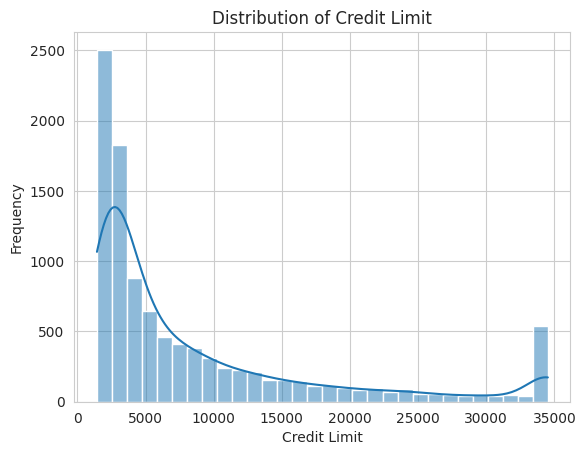

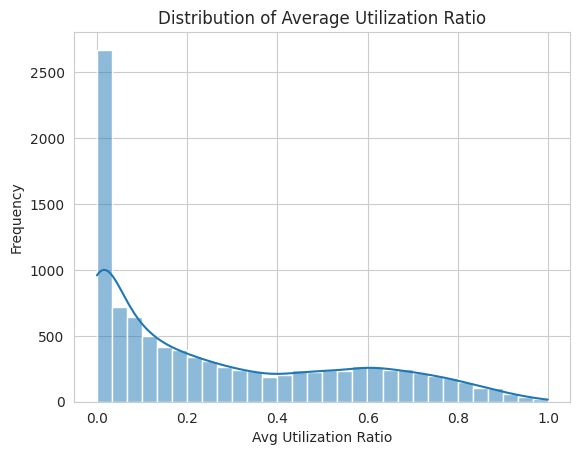

Correlation Matrix:
                       Credit_Limit  Avg_Utilization_Ratio
Credit_Limit               1.000000              -0.482965
Avg_Utilization_Ratio     -0.482965               1.000000


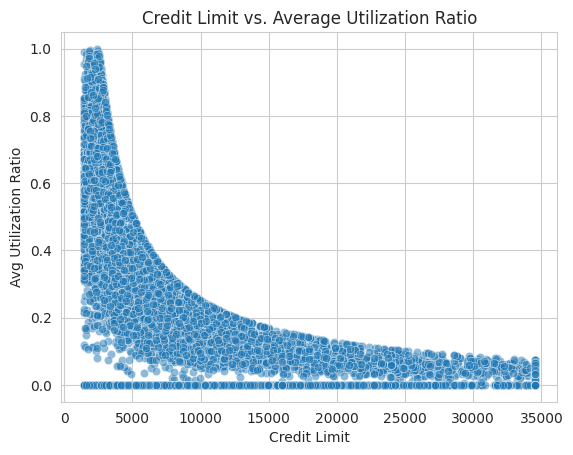

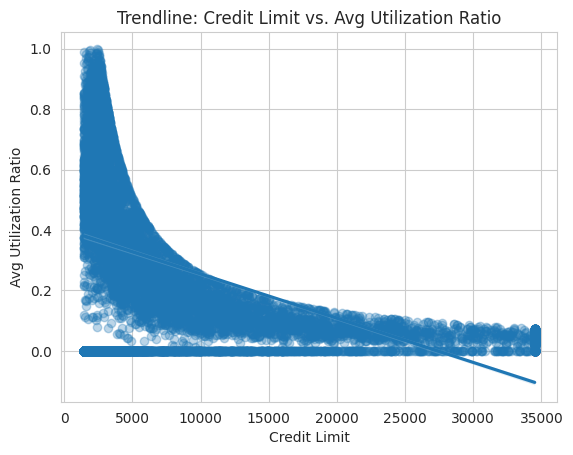

<ipython-input-181-3f0fb4b5cd89>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Credit_Limit_Group')['Avg_Utilization_Ratio'].mean()


Credit_Limit_Group
Low          0.419684
Medium       0.175663
High         0.085227
Very High    0.042711
Name: Avg_Utilization_Ratio, dtype: float64


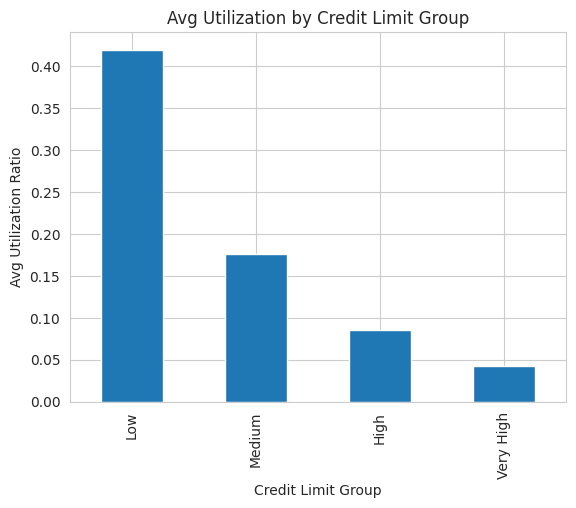

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Step 1: Check Data Distribution ----
# Histogram for Credit Limit
sns.histplot(df['Credit_Limit'], bins=30, kde=True)
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()

# Histogram for Average Utilization Ratio
sns.histplot(df['Avg_Utilization_Ratio'], bins=30, kde=True)
plt.title("Distribution of Average Utilization Ratio")
plt.xlabel("Avg Utilization Ratio")
plt.ylabel("Frequency")
plt.show()

# ---- Step 2: Calculate Correlation ----
correlation = df[['Credit_Limit', 'Avg_Utilization_Ratio']].corr(method='pearson')
print("Correlation Matrix:")
print(correlation)

# ---- Step 3: Scatter Plot to Visualize Correlation ----
sns.scatterplot(x=df['Credit_Limit'], y=df['Avg_Utilization_Ratio'], alpha=0.5)
plt.title("Credit Limit vs. Average Utilization Ratio")
plt.xlabel("Credit Limit")
plt.ylabel("Avg Utilization Ratio")
plt.show()

# ---- Step 4: Add Regression Trendline ----
sns.regplot(x=df['Credit_Limit'], y=df['Avg_Utilization_Ratio'], scatter_kws={'alpha':0.3})
plt.title("Trendline: Credit Limit vs. Avg Utilization Ratio")
plt.xlabel("Credit Limit")
plt.ylabel("Avg Utilization Ratio")
plt.show()

# ---- Step 5: Segment Customers by Credit Limit ----
df['Credit_Limit_Group'] = pd.cut(df['Credit_Limit'], bins=[0, 5000, 10000, 20000, 50000], labels=['Low', 'Medium', 'High', 'Very High'])
grouped = df.groupby('Credit_Limit_Group')['Avg_Utilization_Ratio'].mean()
print(grouped)

# Visualizing the groups
grouped.plot(kind='bar', title="Avg Utilization by Credit Limit Group", ylabel="Avg Utilization Ratio", xlabel="Credit Limit Group")
plt.show()


# Credit utilization analysis:

**Objective of analysis**

The goal of this analysis is to examine the relationship between Credit Limit and Average Utilization Ratio to determine whether customers with higher credit limits use their credit more efficiently.

**Key Observations:**

**Negative Correlation (-0.48):**

A correlation of -0.4829 suggests a moderate negative relationship between Credit Limit and Average Utilization Ratio.

As Credit Limit increases, the Utilization Ratio tends to decrease.

This means customers with higher credit limits generally use a smaller percentage of their available credit.
Possible Explanation:

Customers with higher credit limits may have better financial stability and do not need to max out their credit.

Those with lower credit limits might use a larger proportion of their available credit, leading to a higher utilization ratio.

** Business Insight:**
Low utilization + High Credit Limit = Responsible Borrowers
🔹 These customers are low-risk, possibly prime customers for premium financial products.

High utilization + Low Credit Limit = Financially Constrained Customers

🔹 They may need credit limit increases or financial assistance to avoid debt accumulation.

🔹 Conclusion: The negative correlation suggests that credit limit influences utilization behavior, and banks should use this insight to offer personalized credit offers.

**Interpretation of Results:**

**T-Test Statistic: -1.8988**

This means there is a slight difference in the average age of churned vs. non-churned customers, but it is not strong enough to be statistically significant.

**P-Value: 0.0577**

A p-value of 0.0577 is greater than 0.05, meaning we fail to reject the null hypothesis.

This suggests that there is no strong evidence that customer age significantly affects churn risk.

**What This Means for Business Decisions:**

Age alone is not a strong predictor of churn.

This means other factors (e.g., transaction behavior, credit utilization, engagement with services) might be better indicators of churn.

**Focus on Multi-Factor Analysis:**


Instead of relying on age alone, combining multiple factors (such as spending habits, customer complaints, or engagement level) could provide better insights.


# Churn Risk by Customer Age Analaysis

**T-Test Statistic: -1.8988**

This means there is a slight difference in the average age of churned vs. non-churned customers, but it is not strong enough to be statistically significant.

**P-Value: 0.0577**

A p-value of 0.0577 is greater than 0.05, meaning we fail to reject the null hypothesis.

This suggests that there is no strong evidence that customer age significantly affects churn risk.

**What This Means for Business Decisions:**

Age alone is not a strong predictor of churn.
This means other factors (e.g., transaction behavior, credit utilization, engagement with services) might be better indicators of churn.

Focus on Multi-Factor Analysis:

Instead of relying on age alone, combining multiple factors (such as spending habits, customer complaints, or engagement level) could provide better insights.

Summary Statistics by Churn Status:
                  count       mean       std   min   25%   50%   75%   max
Attrition_Flag                                                           
0               1627.0  46.659496  7.665652  26.0  41.0  47.0  52.0  68.0
1               8500.0  46.262118  8.081157  26.0  41.0  46.0  52.0  73.0


<ipython-input-182-1b044d8f2466>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attrition_Flag"].astype(str), y=df["Customer_Age"], palette={"0": "blue", "1": "red"})


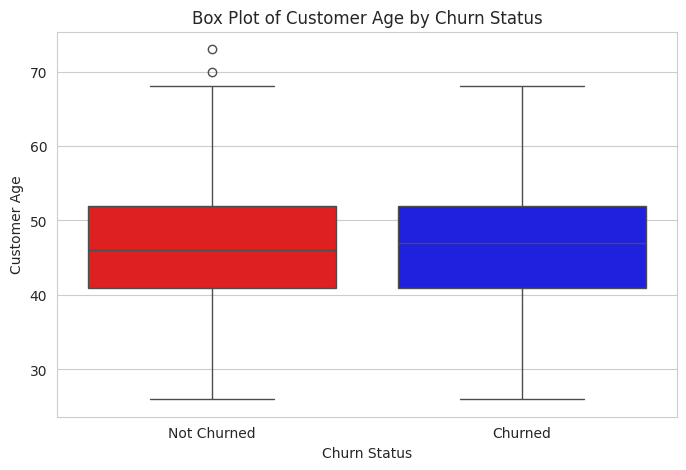

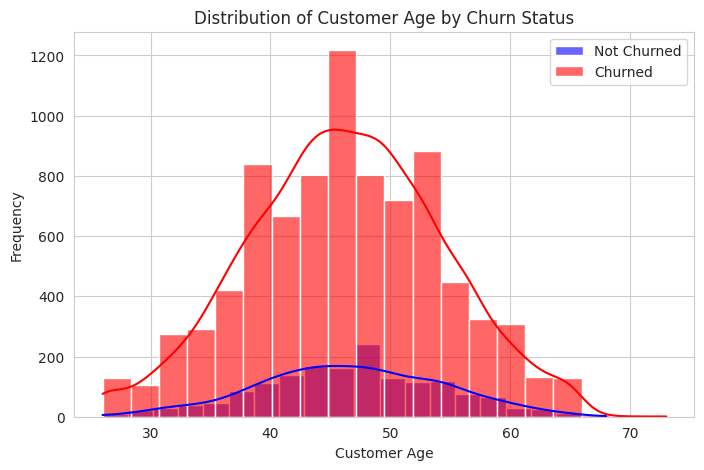

T-Test Statistic: -1.8988, P-Value: 0.0577
There is no statistically significant difference in customer age between churned and non-churned groups.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# ---- Load Data ----
# Assuming df is already loaded with the necessary columns

# ---- Step 1: Summary Statistics ----
age_summary = df.groupby("Attrition_Flag")["Customer_Age"].describe()
print("Summary Statistics by Churn Status:\n", age_summary)

# ---- Step 2: Box Plot ----
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Attrition_Flag"].astype(str), y=df["Customer_Age"], palette={"0": "blue", "1": "red"})
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.xlabel("Churn Status")
plt.ylabel("Customer Age")
plt.title("Box Plot of Customer Age by Churn Status")
plt.show()

# ---- Step 3: Distribution Plot ----
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Attrition_Flag"] == 0]["Customer_Age"], bins=20, color="blue", label="Not Churned", kde=True, alpha=0.6)
sns.histplot(df[df["Attrition_Flag"] == 1]["Customer_Age"], bins=20, color="red", label="Churned", kde=True, alpha=0.6)
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Age by Churn Status")
plt.legend()
plt.show()

# ---- Step 4: Statistical Test ----
churned = df[df["Attrition_Flag"] == 1]["Customer_Age"]
not_churned = df[df["Attrition_Flag"] == 0]["Customer_Age"]

t_stat, p_value = ttest_ind(churned, not_churned, equal_var=False)
print(f"T-Test Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# ---- Interpretation ----
if p_value < 0.05:
    print("There is a statistically significant difference in customer age between churned and non-churned groups.")
else:
    print("There is no statistically significant difference in customer age between churned and non-churned groups.")




# Analysis of Income Category vs. Churn (Attrition) Risk


**1. Understanding the Observed Table**

The table shows the number of customers in each income category who either churned (1) or remained (0). Here’s what it tells us:

Lower-income groups (0, 1, 2, 3) have higher churn rates compared to their non-churned counterparts.

Higher-income groups (4, 5) also have high churn numbers but need to be compared to their total population for proper insights.


**2. Chi-Square Test Interpretation**

**Chi-Square Statistic = 12.8323**

**P-Value = 0.0250**

A p-value of 0.0250 suggests a statistically significant relationship between Income Category and Attrition Flag at a 5% significance level (p < 0.05). This means that income level affects churn rate, and the differences are not due to random chance.

**3. Comparing Expected vs. Observed Frequencies**

The expected frequency table shows the values we would expect if there were no relationship between income level and churn.

If the observed values differ significantly from the expected values, it confirms that churn behavior is influenced by income level.

**4. Key Takeaways**

Lower-income customers (categories 0, 1, 2, 3) have a higher risk of churn.

Higher-income customers (categories 4, 5) still churn but at a slightly different rate than expected.

The significant p-value confirms that income level plays a role in customer retention and attrition risk.

# 5. Business Implications

Targeted retention strategies should be designed for low-income customers to reduce churn.

Premium services or loyalty programs could be leveraged for higher-income customers to increase engagement.

Further analysis on customer behavior within each income category can help refine strategies to reduce attrition.


Chi-Square Contingency Table:

Attrition_Flag     0     1
Income_Category           
0                126   601
1                271  1519
2                189  1213
3                242  1293
4                612  2949
5                187   925

Chi-Square Statistic: 12.8323, P-Value: 0.0250

Expected Frequencies Table:

Attrition_Flag            0            1
Income_Category                         
0                116.799546   610.200454
1                287.580725  1502.419275
2                225.244791  1176.755209
3                246.612521  1288.387479
4                572.108917  2988.891083
5                178.653501   933.346499


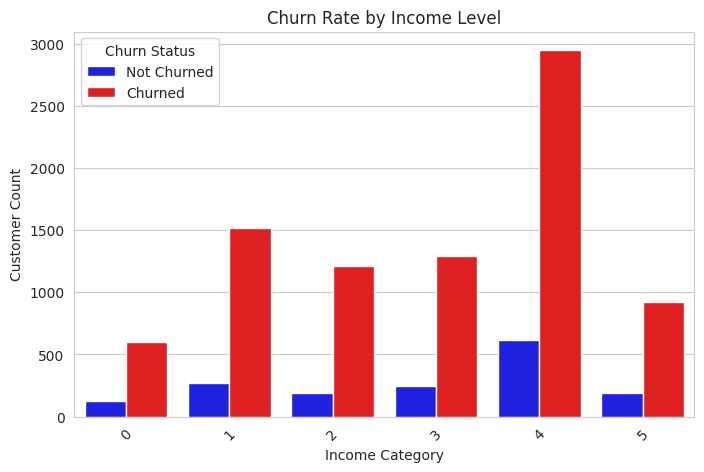

In [ ]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Step 1: Create Chi-Square Contingency Table ----
income_churn_table = pd.crosstab(df['Income_Category'], df['Attrition_Flag'])

# Print Observed Frequencies (Chi-Square Table)
print("Chi-Square Contingency Table:\n")
print(income_churn_table)

# ---- Step 2: Perform Chi-Square Test ----
chi2_stat, p_value, dof, expected = stats.chi2_contingency(income_churn_table)

# Print Test Results
print(f"\nChi-Square Statistic: {chi2_stat:.4f}, P-Value: {p_value:.4f}")

# Print Expected Frequencies Table
print("\nExpected Frequencies Table:\n")
print(pd.DataFrame(expected, index=income_churn_table.index, columns=income_churn_table.columns))

# ---- Step 3: Bar Plot for Churn Rate by Income Level ----
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Income_Category', hue='Attrition_Flag', palette={0: 'blue', 1: 'red'})
plt.xticks(rotation=45)
plt.xlabel("Income Category")
plt.ylabel("Customer Count")
plt.title("Churn Rate by Income Level")
plt.legend(title="Churn Status", labels=["Not Churned", "Churned"])
plt.show()


# Revenue Contribution by income Category


Revenue Contribution by Income Category:

   Income_Category  Total_Trans_Amt  Contribution (%)
4                4         15538139         34.838735
1                1          7886058         17.681672
3                3          6881344         15.428959
2                2          6239899         13.990748
5                5          4761819         10.676681
0                0          3292923          7.383205


<ipython-input-184-0f0e5ae5a38b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_revenue, x="Income_Category", y="Total_Trans_Amt", palette="viridis")


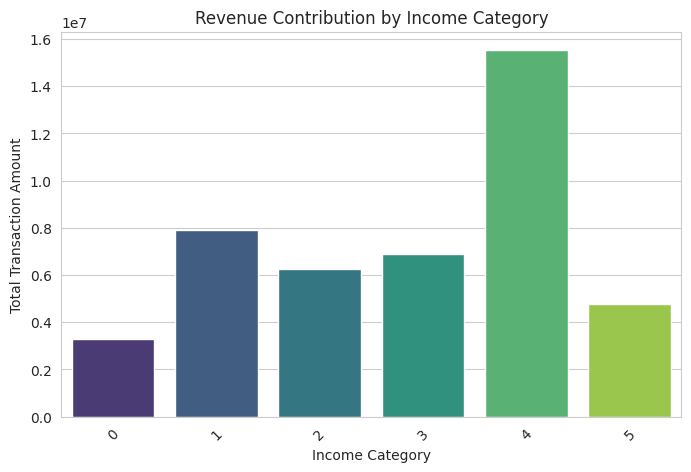

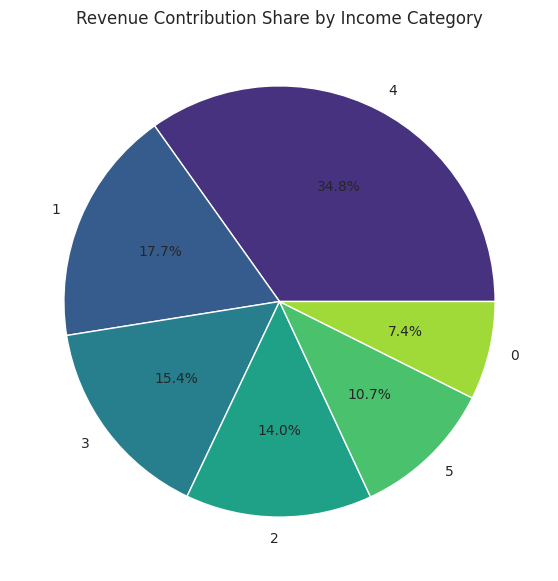

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Step 1: Aggregate Total Transaction Amount by Income Category ----
income_revenue = df.groupby("Income_Category")["Total_Trans_Amt"].sum().reset_index()

# ---- Step 2: Calculate Percentage Contribution ----
income_revenue["Contribution (%)"] = (income_revenue["Total_Trans_Amt"] / income_revenue["Total_Trans_Amt"].sum()) * 100

# ---- Step 3: Sort Data for Better Visualization ----
income_revenue = income_revenue.sort_values(by="Total_Trans_Amt", ascending=False)

# ---- Step 4: Print the Revenue Contribution Table ----
print("\nRevenue Contribution by Income Category:\n")
print(income_revenue)

# ---- Step 5: Bar Chart Visualization ----
plt.figure(figsize=(8, 5))
sns.barplot(data=income_revenue, x="Income_Category", y="Total_Trans_Amt", palette="viridis")
plt.xlabel("Income Category")
plt.ylabel("Total Transaction Amount")
plt.title("Revenue Contribution by Income Category")
plt.xticks(rotation=45)
plt.show()

# ---- Step 6: Pie Chart for Percentage Contribution ----
plt.figure(figsize=(7, 7))
plt.pie(income_revenue["Total_Trans_Amt"], labels=income_revenue["Income_Category"], autopct="%1.1f%%", colors=sns.color_palette("viridis", len(income_revenue)))
plt.title("Revenue Contribution Share by Income Category")
plt.show()



Revenue Contribution by Income Category:

  Income_Category  Total_Trans_Amt  Contribution (%)
0         $120K +         15538139         34.838735
1     $40K - $60K          7886058         17.681672
3    $80K - $120K          6881344         15.428959
2     $60K - $80K          6239899         13.990748
5         Unknown          4761819         10.676681
4  Less than $40K          3292923          7.383205


<ipython-input-185-7bef081af6f8>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_revenue, x="Income_Category", y="Total_Trans_Amt", palette="viridis")


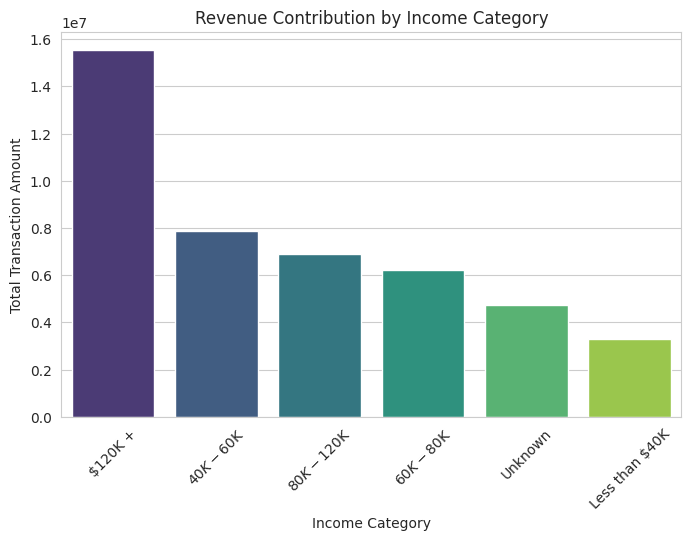

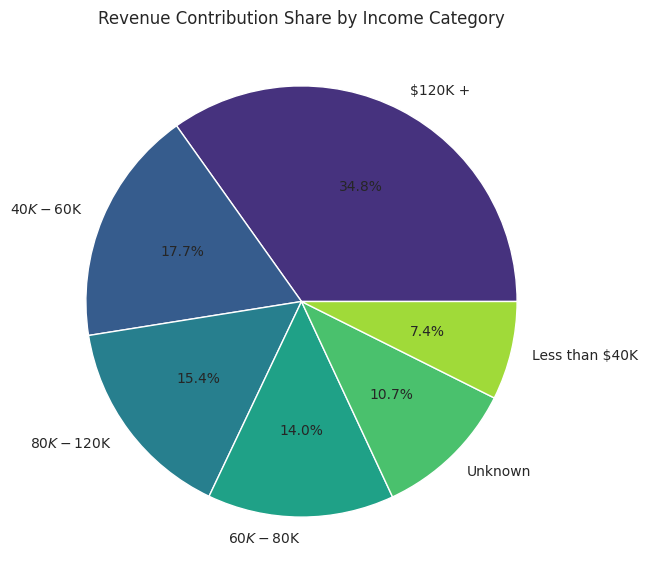

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Step 1: Define Income Category Mapping ----
income_mapping = {
    0: "Less than $40K",
    1: "$40K - $60K",
    2: "$60K - $80K",
    3: "$80K - $120K",
    4: "$120K +",
    5: "Unknown"
}

# ---- Step 2: Replace Income_Category Codes with Labels ----
df["Income_Category"] = df["Income_Category"].map(income_mapping)

# ---- Step 3: Aggregate Total Transaction Amount by Income Category ----
income_revenue = df.groupby("Income_Category")["Total_Trans_Amt"].sum().reset_index()

# ---- Step 4: Calculate Percentage Contribution ----
income_revenue["Contribution (%)"] = (income_revenue["Total_Trans_Amt"] / income_revenue["Total_Trans_Amt"].sum()) * 100

# ---- Step 5: Sort Data for Better Visualization ----
income_revenue = income_revenue.sort_values(by="Total_Trans_Amt", ascending=False)

# ---- Step 6: Print the Revenue Contribution Table ----
print("\nRevenue Contribution by Income Category:\n")
print(income_revenue)

# ---- Step 7: Bar Chart Visualization ----
plt.figure(figsize=(8, 5))
sns.barplot(data=income_revenue, x="Income_Category", y="Total_Trans_Amt", palette="viridis")
plt.xlabel("Income Category")
plt.ylabel("Total Transaction Amount")
plt.title("Revenue Contribution by Income Category")
plt.xticks(rotation=45)
plt.show()

# ---- Step 8: Pie Chart for Percentage Contribution ----
plt.figure(figsize=(7, 7))
plt.pie(income_revenue["Total_Trans_Amt"], labels=income_revenue["Income_Category"], autopct="%1.1f%%", colors=sns.color_palette("viridis", len(income_revenue)))
plt.title("Revenue Contribution Share by Income Category")
plt.show()


#High value customer identifications
# Step 1: Find the Top Spenders
I looked at the Total_Trans_Amt (total money spent by each customer).
I found the top 10% highest spenders using the 90th percentile.

# Step 2: Label Customers
I created a new category:

"High-Value" → If their spending is in the top 10%.
"Regular" → If they spend less than the top 10%.
# Step 3: Compare Spending Patterns
I calculated average spending for both groups.
I checked if high-value customers behave differently from regular ones.

# Step 4: Create Graphs to Visualize the Data
Histogram → Shows how customer spending is distributed, with a red line marking the top 10% threshold.
Bar Chart → Compares the number of high-value vs. regular customers.
Box Plot → Helps see the spending difference between the two groups.
# Step 5: Analyze & Take Action
I saw that high-value customers contribute the most to revenue.
Businesses should focus on keeping these customers happy by offering:

Exclusive rewards & discounts
Loyalty programs
Personalized offers
 # Conclusion: This analysis helps businesses find their best customers and create strategies to keep them loyal!








Summary Statistics for High-Value Customers:

          CLIENTNUM  Attrition_Flag  Customer_Age       Gender  \
count  1.013000e+03     1013.000000   1013.000000  1013.000000   
mean   7.357837e+08        0.873643     45.145114     0.614018   
std    3.555345e+07        0.332416      7.939225     0.487067   
min    7.080821e+08        0.000000     27.000000     0.000000   
25%    7.122964e+08        1.000000     40.000000     0.000000   
50%    7.172142e+08        1.000000     46.000000     1.000000   
75%    7.686432e+08        1.000000     51.000000     1.000000   
max    8.279012e+08        1.000000     63.000000     1.000000   

       Dependent_count  Education_Level  Marital_Status  Card_Category  \
count      1013.000000      1013.000000     1013.000000    1013.000000   
mean          2.315893         3.206318        1.485686       0.572557   
std           1.329549         1.799176        0.743245       1.136841   
min           0.000000         0.000000        0.000000       

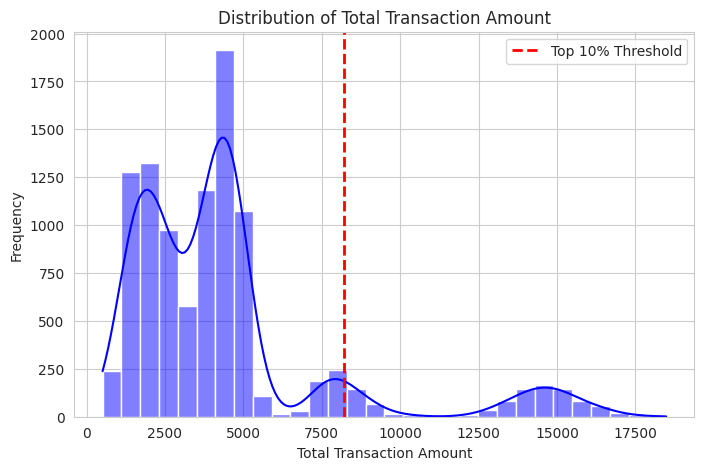

<ipython-input-186-e206424a6065>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_counts.index, y=customer_counts.values, palette=["red", "blue"])


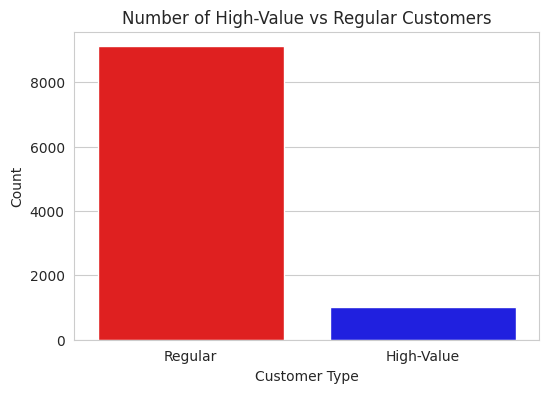

<ipython-input-186-e206424a6065>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="High_Value_Customer", y="Total_Trans_Amt", palette=["blue", "red"])


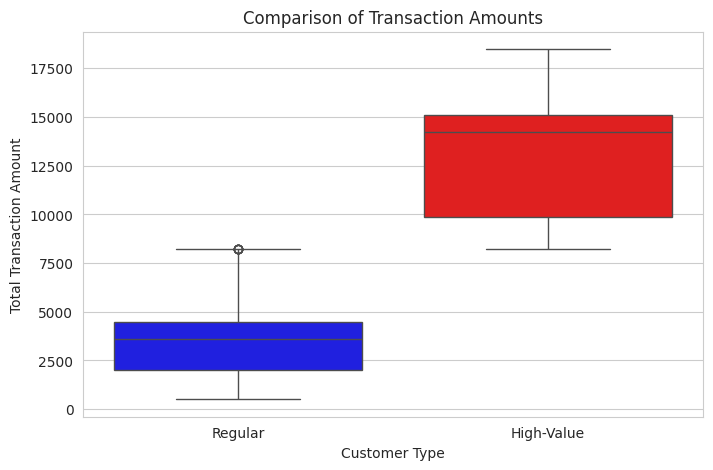

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Step 1: Define High-Value Customer Threshold ----
top_percentile = df["Total_Trans_Amt"].quantile(0.90)  # Top 10% customers

# ---- Step 2: Identify High-Value Customers ----
df["High_Value_Customer"] = df["Total_Trans_Amt"] >= top_percentile

# ---- Step 3: Extract High-Value Customers Data ----
high_value_customers = df[df["High_Value_Customer"]]

# ---- Step 4: Summary Statistics of High-Value Customers ----
print("\nSummary Statistics for High-Value Customers:\n")
print(high_value_customers.describe())

# ---- Step 5: Count of High-Value vs Regular Customers ----
customer_counts = df["High_Value_Customer"].value_counts().rename(index={True: "High-Value", False: "Regular"})

# ---- Step 6: Visualization - Distribution of Transaction Amount ----
plt.figure(figsize=(8, 5))
sns.histplot(df["Total_Trans_Amt"], bins=30, kde=True, color="blue")
plt.axvline(top_percentile, color="red", linestyle="dashed", linewidth=2, label="Top 10% Threshold")
plt.xlabel("Total Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Total Transaction Amount")
plt.legend()
plt.show()

# ---- Step 7: Visualization - High-Value vs Regular Customer Count ----
plt.figure(figsize=(6, 4))
sns.barplot(x=customer_counts.index, y=customer_counts.values, palette=["red", "blue"])
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.title("Number of High-Value vs Regular Customers")
plt.show()

# ---- Step 8: Behavioral Analysis of High-Value Customers ----
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="High_Value_Customer", y="Total_Trans_Amt", palette=["blue", "red"])
plt.xticks([0, 1], ["Regular", "High-Value"])
plt.xlabel("Customer Type")
plt.ylabel("Total Transaction Amount")
plt.title("Comparison of Transaction Amounts")
plt.show()


# Interpretation of Customer Spending Differences Using ANOVA and Tukey HSD Test

# Objective:

The goal of this analysis is to examine whether customer spending (Total_Trans_Amt) differs based on customer relationship count (Total_Relationship_Count) and determine which customer groups the bank should focus on.

**Step 1: ANOVA Test**
**What is ANOVA?**

ANOVA (Analysis of Variance) is used to check if there is a significant difference in spending between different relationship groups. It does not tell us which groups are different, just that at least one group differs.

**Results Interpretation:**

ANOVA Test Statistic: 430.8849
P-Value: 0.0000

Since the p-value is very small (less than 0.05), we conclude that there is a significant difference in spending between at least two customer groups. However, ANOVA does not tell us which groups differ, so we use Tukey's HSD test to investigate further.

 **Step 2: Tukey HSD Test**

What is Tukey’s HSD Test?

Tukey’s Honestly Significant Difference (HSD) test compares every possible pair of groups to see where significant differences exist.

Results Interpretation:

The "meandiff" column shows the difference in average spending between two groups.

The "p-adj" (adjusted p-value) tells us if the difference is statistically significant (less than 0.05 means a real difference).

The "reject" column indicates whether we reject the idea that the two groups have the same average spending (True = significant difference, False = no difference).

Step 3: Identifying Key Groups for the Bank to Focus On

We focus on groups where the reject column = True because these indicate significant spending differences.

**Key Findings:**

**Group 1 (Lowest Relationship Count) vs. Groups 3, 4, 5, and 6**

**These groups have a large and significant spending difference (p-value = 0.000).**

**Customers with higher relationships (Groups 3, 4, 5, and 6) spend significantly more than those in Group 1.**

**Group 2 vs. Groups 3, 4, 5, and 6**

**Customers in Group 2 spend significantly less than those in Groups 3, 4, 5, and 6.**

Differences within high-relationship groups:

Group 3 vs. Group 5 and Group 6 → Significant differences (Group 6 spends more).
Group 4 vs. Group 6 → Significant difference (Group 6 spends more).

Step 4: Business Recommendations

**Which Groups Should the Bank Focus On?**

Encourage low-relationship customers (Groups 1 & 2) to build a stronger relationship.

Since customers with more relationships tend to spend more, the bank should introduce cross-selling and bundling strategies to encourage them to use more services.
Reward and retain high-relationship customers (Groups 5 & 6).

These customers already spend significantly more.

The bank should offer exclusive perks, rewards, and loyalty programs to ensure they remain engaged.
Personalized marketing for Groups 3 & 4.

Since spending increases as the relationship count increases, targeted financial advisory services and customized banking solutions can help move customers from mid-level relationships to high-value relationships.

       Total_Relationship_Count  Total_Trans_Amt
count              10127.000000     10127.000000
mean                   3.812580      4404.086304
std                    1.554408      3397.129254
min                    1.000000       510.000000
25%                    3.000000      2155.500000
50%                    4.000000      3899.000000
75%                    5.000000      4741.000000
max                    6.000000     18484.000000

Correlation between Total_Relationship_Count and Total_Trans_Amt: -0.3472


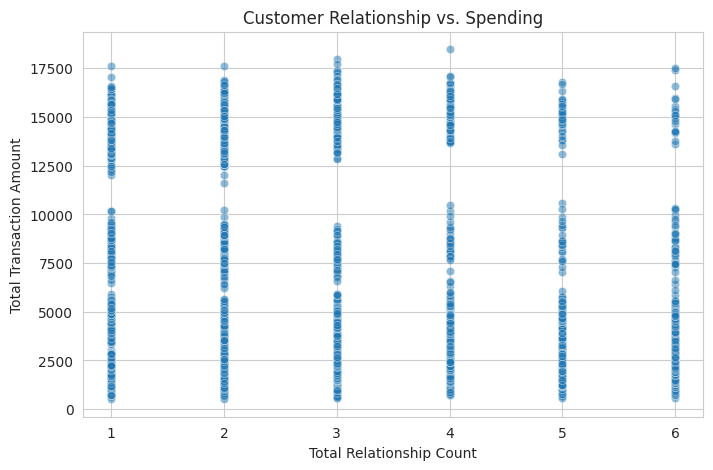

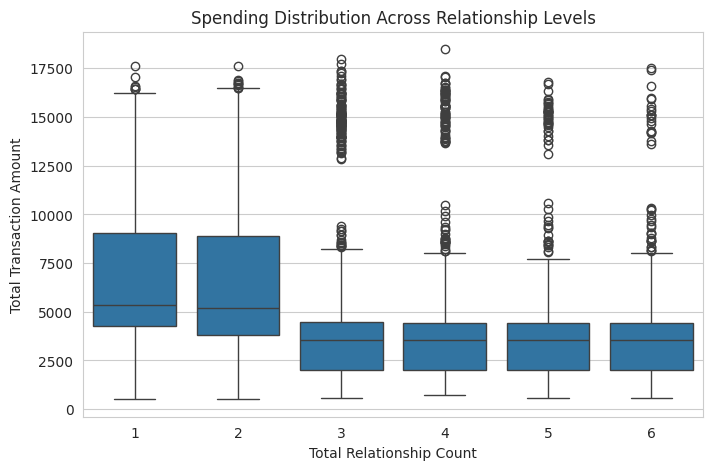


ANOVA Test Statistic: 430.8849, P-Value: 0.0000
There is a significant difference in spending based on relationship count.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# ---- Step 1: Check Data ----
print(df[['Total_Relationship_Count', 'Total_Trans_Amt']].describe())

# ---- Step 2: Calculate Correlation ----
correlation = df['Total_Relationship_Count'].corr(df['Total_Trans_Amt'])
print(f"\nCorrelation between Total_Relationship_Count and Total_Trans_Amt: {correlation:.4f}")

# ---- Step 3: Scatter Plot ----
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total_Relationship_Count', y='Total_Trans_Amt', alpha=0.5)
plt.xlabel("Total Relationship Count")
plt.ylabel("Total Transaction Amount")
plt.title("Customer Relationship vs. Spending")
plt.show()

# ---- Step 4: Box Plot ----
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Total_Relationship_Count', y='Total_Trans_Amt')
plt.xlabel("Total Relationship Count")
plt.ylabel("Total Transaction Amount")
plt.title("Spending Distribution Across Relationship Levels")
plt.show()

# ---- Step 5: Statistical Test ----
# Perform ANOVA to check if spending varies significantly across relationship levels
anova_stat, p_value = stats.f_oneway(*[df[df['Total_Relationship_Count'] == i]['Total_Trans_Amt']
                                       for i in df['Total_Relationship_Count'].unique()])

print(f"\nANOVA Test Statistic: {anova_stat:.4f}, P-Value: {p_value:.4f}")

# ---- Interpretation ----
if p_value < 0.05:
    print("There is a significant difference in spending based on relationship count.")
else:
    print("No significant difference in spending based on relationship count.")


ANOVA Test Statistic: 430.8849, P-Value: 0.0000

Tukey HSD Test Results:

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
     1      2  -233.7696 0.5074  -617.4431    149.904  False
     1      3 -3316.6382    0.0  -3660.933 -2972.3434   True
     1      4 -3497.9469    0.0 -3852.1154 -3143.7783   True
     1      5  -3737.585    0.0 -4092.3871 -3382.7828   True
     1      6 -3836.4631    0.0 -4192.0366 -3480.8897   True
     2      3 -3082.8686    0.0 -3392.3375 -2773.3998   True
     2      4 -3264.1773    0.0 -3584.5949 -2943.7598   True
     2      5 -3503.8154    0.0 -3824.9331 -3182.6977   True
     2      6 -3602.6936    0.0 -3924.6634 -3280.7238   True
     3      4  -181.3087 0.4023  -453.3398    90.7224  False
     3      5  -420.9468 0.0002  -693.8022  -148.0913   True
     3      6  -519.8249    0.0  -793.6826  -245.9673   True
     4     

<ipython-input-188-73094e1bf5ea>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Total_Relationship_Count"], y=df["Total_Trans_Amt"], palette="coolwarm")


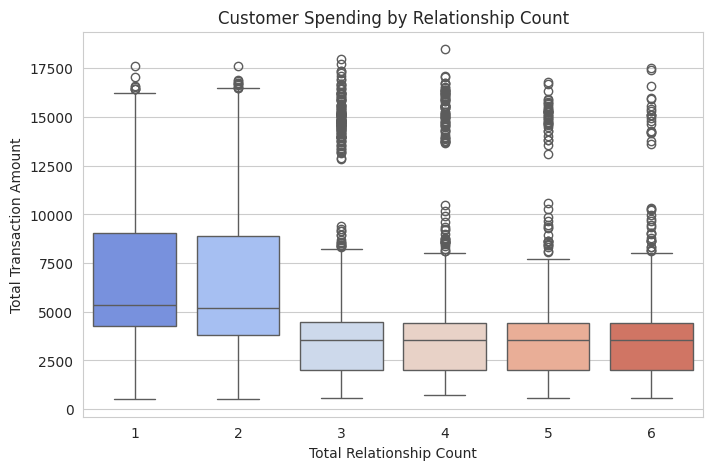

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ---- Step 1: Perform ANOVA Test ----
anova_result = stats.f_oneway(
    *[df[df['Total_Relationship_Count'] == x]['Total_Trans_Amt'] for x in df['Total_Relationship_Count'].unique()]
)

# Print ANOVA Results
print(f"ANOVA Test Statistic: {anova_result.statistic:.4f}, P-Value: {anova_result.pvalue:.4f}")

# ---- Step 2: Perform Tukey's HSD Post-Hoc Test ----
tukey_test = pairwise_tukeyhsd(df['Total_Trans_Amt'], df['Total_Relationship_Count'])
print("\nTukey HSD Test Results:\n")
print(tukey_test)

# ---- Step 3: Box Plot to Visualize Spending by Relationship Count ----
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Total_Relationship_Count"], y=df["Total_Trans_Amt"], palette="coolwarm")
plt.xlabel("Total Relationship Count")
plt.ylabel("Total Transaction Amount")
plt.title("Customer Spending by Relationship Count")
plt.show()



# Effect of card Type on Transactions

**Blue cards drive the highest transaction volume (9,436 transactions) and contribute the most to total revenue.**

**Silver and Gold cards have the highest average transaction values(8,999 & $7,685), but they are rarely used.**

**Platinum cards balance between volume and value, making them valuable for premium customers.**

**To maximize revenue, increase high-value transactions for Gold & Platinum users while maintaining Blue card usage.**

  Card_Category  Transaction_Volume  Total_Transaction_Amount  \
0          Blue                9436                  39870938   
1          Gold                 116                    891531   
2      Platinum                  20                    179995   
3        Silver                 555                   3657718   

   Average_Transaction_Value  
0                4225.406740  
1                7685.612069  
2                8999.750000  
3                6590.482883  


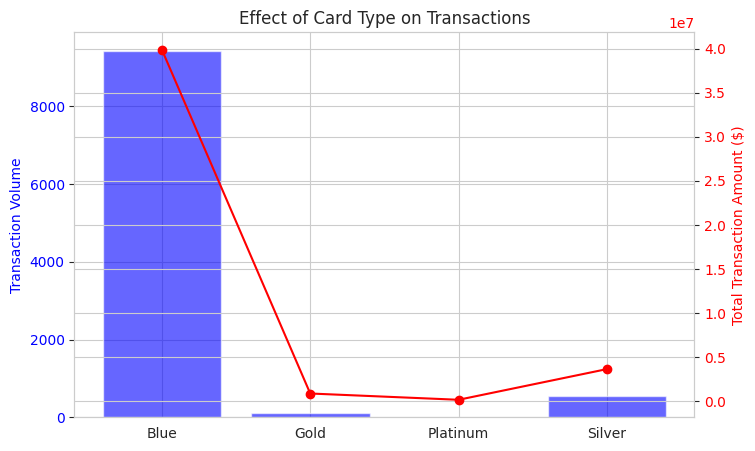

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the correct mapping of numeric categories to card names
card_mapping = {
    0: 'Blue',
    1: 'Gold',
    2: 'Platinum',
    3: 'Silver'
}

# Group by Card_Category and calculate metrics
card_analysis = df.groupby('Card_Category').agg(
    Transaction_Volume=('Total_Trans_Amt', 'count'),
    Total_Transaction_Amount=('Total_Trans_Amt', 'sum'),
    Average_Transaction_Value=('Total_Trans_Amt', 'mean')
).reset_index()

# Replace numbers with actual card names
card_analysis['Card_Category'] = card_analysis['Card_Category'].map(card_mapping)

# Display the updated table
print(card_analysis)

# Plot transaction volume and total amount
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart for transaction volume
ax1.bar(card_analysis['Card_Category'], card_analysis['Transaction_Volume'], color='blue', alpha=0.6, label="Transaction Volume")
ax1.set_ylabel('Transaction Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for total transaction amount
ax2 = ax1.twinx()
ax2.plot(card_analysis['Card_Category'], card_analysis['Total_Transaction_Amount'], color='red', marker='o', label="Total Transaction Amount")
ax2.set_ylabel('Total Transaction Amount ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Effect of Card Type on Transactions')
plt.show()


  Card_Category  Transaction_Volume  Total_Transaction_Amount  \
0          Blue                9436                  39870938   
1          Gold                 116                    891531   
2        Silver                  20                    179995   
3      Platinum                 555                   3657718   

   Average_Transaction_Value  
0                4225.406740  
1                7685.612069  
2                8999.750000  
3                6590.482883  


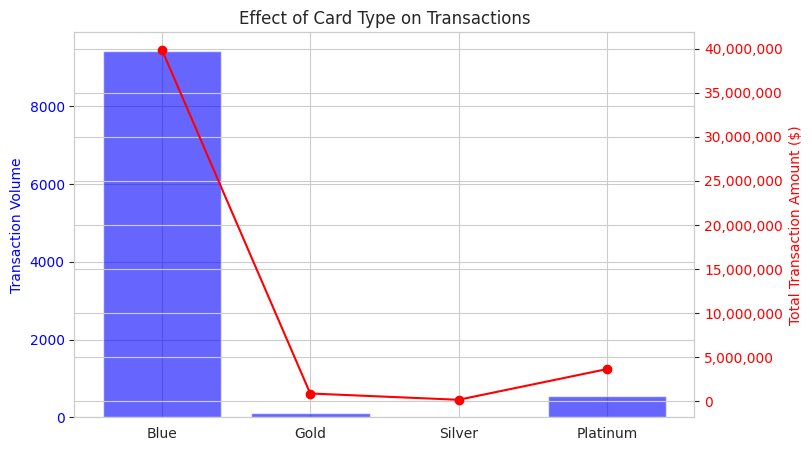

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  # Import ticker module

# Define the correct mapping of numeric categories to card names
card_mapping = {
    0: 'Blue',
    1: 'Gold',
    2: 'Silver',
    3: 'Platinum'
}

# Group by Card_Category and calculate metrics
card_analysis = df.groupby('Card_Category').agg(
    Transaction_Volume=('Total_Trans_Amt', 'count'),
    Total_Transaction_Amount=('Total_Trans_Amt', 'sum'),
    Average_Transaction_Value=('Total_Trans_Amt', 'mean')
).reset_index()

# Replace numbers with actual card names
card_analysis['Card_Category'] = card_analysis['Card_Category'].map(card_mapping)

# Display the updated table
print(card_analysis)

# Plot transaction volume and total amount
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart for transaction volume
ax1.bar(card_analysis['Card_Category'], card_analysis['Transaction_Volume'], color='blue', alpha=0.6, label="Transaction Volume")
ax1.set_ylabel('Transaction Volume', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for total transaction amount
ax2 = ax1.twinx()
ax2.plot(card_analysis['Card_Category'], card_analysis['Total_Transaction_Amount'], color='red', marker='o', label="Total Transaction Amount")
ax2.set_ylabel('Total Transaction Amount ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Format Y-axis of Total Transaction Amount to show numbers (thousands, millions, etc.)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Effect of Card Type on Transactions')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load dataset (assuming df is already defined)
df_clean = df.dropna(subset=['Attrition_Flag'])  # Remove rows where Attrition_Flag is NaN

# Selecting important variables (based on previous recommendations)
selected_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]

# Define X (independent variables) and y (target variable)
X = df_clean[selected_features]
y = df_clean['Attrition_Flag']

# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Model Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.49      0.59       325
           1       0.91      0.97      0.94      1701

    accuracy                           0.89      2026
   macro avg       0.82      0.73      0.76      2026
weighted avg       0.88      0.89      0.88      2026



Optimization terminated successfully.
         Current function value: 0.260572
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10115
Method:                           MLE   Df Model:                           11
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                  0.4088
Time:                        15:48:51   Log-Likelihood:                -2638.8
converged:                       True   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.2267      0.308    -10.492      0.000      -3.829

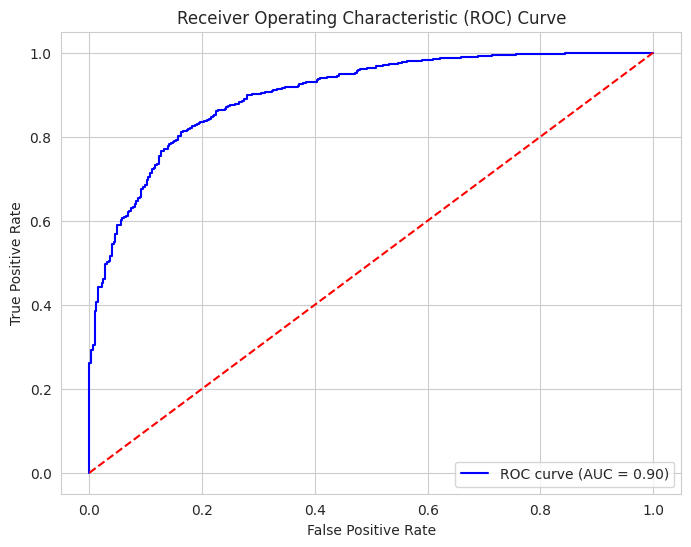

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load dataset (assuming df is already defined)
df_clean = df.dropna(subset=['Attrition_Flag'])  # Remove rows where Attrition_Flag is NaN

# Selecting important variables (based on previous recommendations)
selected_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]

# Define X (independent variables) and y (target variable)
X = df_clean[selected_features]
y = df_clean['Attrition_Flag']

# Add constant (intercept) to X for statsmodels
X_with_const = sm.add_constant(X)

# Fit Logistic Regression Model using statsmodels to get p-values and odds ratios
log_reg_model = sm.Logit(y, X_with_const)
log_reg_result = log_reg_model.fit()

# Print summary for p-values, coefficients, and other statistics
print(log_reg_result.summary())

# Calculate odds ratios (exponentiated coefficients)
odds_ratios = np.exp(log_reg_result.params)
print("\nOdds Ratios:\n", odds_ratios)

# Train Logistic Regression Model with sklearn for predictions and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model using LogisticRegression from sklearn
log_reg = LogisticRegression(max_iter=500, solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"\nModel Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Compute ROC Curve and AUC
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability estimates for class 1
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Optimization terminated successfully.
         Current function value: 0.260572
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10115
Method:                           MLE   Df Model:                           11
Date:                Sat, 22 Mar 2025   Pseudo R-squ.:                  0.4088
Time:                        15:48:52   Log-Likelihood:                -2638.8
converged:                       True   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.2267      0.308    -10.492      0.000      -3.829

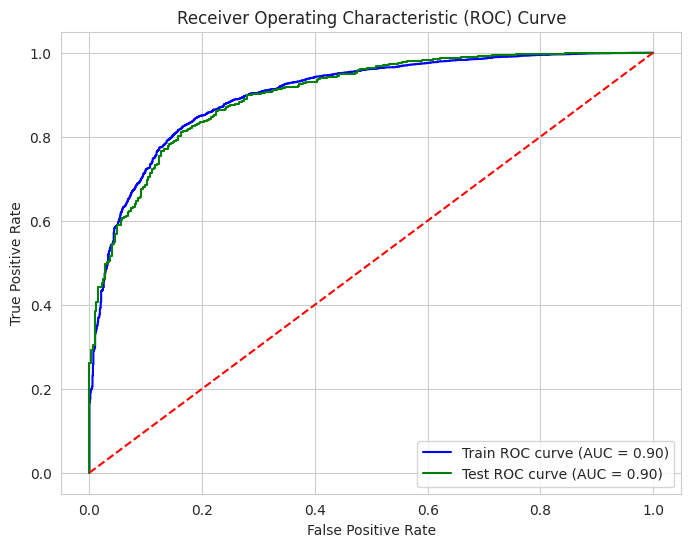


Summary Table:
       Metric  Train Set  Test Set
0   Accuracy   0.886187  0.890918
1  Precision   0.905590  0.908840
2     Recall   0.964995  0.967078
3   F1 Score   0.934349  0.937055
4    ROC AUC   0.903709  0.901367

Confusion Matrix (Train):
 [[ 618  684]
 [ 238 6561]]

Confusion Matrix (Test):
 [[ 160  165]
 [  56 1645]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Load dataset (assuming df is already defined)
df_clean = df.dropna(subset=['Attrition_Flag'])  # Remove rows where Attrition_Flag is NaN

# Selecting important variables (based on previous recommendations)
selected_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'
]

# Define X (independent variables) and y (target variable)
X = df_clean[selected_features]
y = df_clean['Attrition_Flag']

# Add constant (intercept) to X for statsmodels
X_with_const = sm.add_constant(X)

# Fit Logistic Regression Model using statsmodels to get p-values and odds ratios
log_reg_model = sm.Logit(y, X_with_const)
log_reg_result = log_reg_model.fit()

# Print summary for p-values, coefficients, and other statistics
print(log_reg_result.summary())

# Calculate odds ratios (exponentiated coefficients)
odds_ratios = np.exp(log_reg_result.params)
print("\nOdds Ratios:\n", odds_ratios)

# Train Logistic Regression Model with sklearn for predictions and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model using LogisticRegression from sklearn
log_reg = LogisticRegression(max_iter=500, solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions for both training and testing data
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Predictions for probability (for ROC curve)
y_train_prob = log_reg.predict_proba(X_train)[:, 1]
y_test_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluate Model Performance on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Evaluate other metrics
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Generate classification reports
report_train = classification_report(y_train, y_train_pred, output_dict=True)
report_test = classification_report(y_test, y_test_pred, output_dict=True)

# Confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Compute ROC Curve and AUC
roc_auc_train = roc_auc_score(y_train, y_train_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# Plot ROC Curve for both training and testing sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display metrics in a summary table
summary_table = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Train Set': [accuracy_train, precision_train, recall_train, f1_train, roc_auc_train],
    'Test Set': [accuracy_test, precision_test, recall_test, f1_test, roc_auc_test]
}

summary_df = pd.DataFrame(summary_table)
print("\nSummary Table:\n", summary_df)

# Display confusion matrices
print("\nConfusion Matrix (Train):\n", conf_matrix_train)
print("\nConfusion Matrix (Test):\n", conf_matrix_test)
